In [2]:
import sys
sys.path.append('..')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from video_codec_cnn.extract_cnn_features import extract_features

Using TensorFlow backend.


In [3]:
dataset_root = '/home/nbonettini/MFC18_EvalPart1_Video_Ver1/'

In [4]:
df = pd.read_csv('/nas/public/dataset/medifor/MFC18_EvalPart1_Video_Ver1-Reference/reference/manipulation-video/MFC18_EvalPart1-manipulation-video-ref.csv', sep='|')

In [5]:
pd.options.display.max_columns = 999
df

,TaskID,ProbeFileID,ProbeFileName,IsTarget,ProbeMaskFileName,ProbeBitPlaneMaskFileName,ProbeBrowserFileName,BaseFileName,BaseBrowserFileName,JournalName,ProjectDescription,ProjectType,JournalSource,PostprocessCompression,SemanticRepurposing,People,AntiforensicAddCamFingerprintPRNU,AudioClone,CompositePixelSize,AudioSplice,SeamCarving,ImageCompressionTable,ImageCompression,AudioActivity,TemporalOther,AudioVoiceOver,PostprocessCropFrames,AntiforensicAberrationCorrection,DataEmbeddingWatermark,AntiforensicCFACorrection,LaunderingSocialMedia,TemporalRemove,AntiforensicOther,AudioOthers,ImageReformat,AudioRemoval,AudioVoiceSwapping,SpatialOther,AntiforensicNoiseRestoration,TemporalReorder,SemanticRefabrication,SpatialSplice,SpatialClone,SpatialMovingObject,SpatialRemove,AntiforensicIllumination,LaunderingMedianFiltering,TemporalClone,Recapture,Mosaicing,ManipulationCategory,Natural,PostprocessStabilization,DataEmbeddingSteganography,SemanticRestaging,SpatialMovingCamera,TemporalSplice,FaceManipulations,ReflectionManipulations,ShadowManipulations
0,manipulation,001c934acb38a59cb28b680b79485dcd,probe/001c934acb38a59cb28b680b79485dcd.mp4,N,NaN,NaN,001c934acb38a59cb28b680b79485dcd.mp4,world/001c934acb38a59cb28b680b79485dcd.mp4,001c934acb38a59cb28b680b79485dcd.mp4,001c934acb38a59cb28b680b79485dcd,denver audio,video,NaN,no,no,no,no,no,no,no,no,no,double,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,manipulation,0091ab5777b1471fd91f064e4a60a595,probe/0091ab5777b1471fd91f064e4a60a595.mp4,N,NaN,NaN,0091ab5777b1471fd91f064e4a60a595.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,manipulation,0129177928b30b3e69f5d4e423096443,probe/0129177928b30b3e69f5d4e423096443.mp4,N,NaN,NaN,0129177928b30b3e69f5d4e423096443.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,manipulation,014626484bcedfa95d97be1cbf18a6c4,probe/014626484bcedfa95d97be1cbf18a6c4.mov,N,NaN,NaN,014626484bcedfa95d97be1cbf18a6c4.mov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,manipulation,01a1abdac4b4a7d06e1b49c4bc6eab59,probe/01a1abdac4b4a7d06e1b49c4bc6eab59.mp4,N,NaN,NaN,01a1abdac4b4a7d06e1b49c4bc6eab59.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,manipulation,01b24a3e3dbc4db3f2ae041a71706672,probe/01b24a3e3dbc4db3f2ae041a71706672.mp4,N,NaN,NaN,01b24a3e3dbc4db3f2ae041a71706672.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,manipulation,01d1021c3452df3c3bdcbe950f7e632e,probe/01d1021c3452df3c3bdcbe950f7e632e.mp4,Y,NaN,NaN,01d1021c3452df3c3bdcbe950f7e632e.mp4,world/a827f69d3af269c37721e327d2788f0f.mp4,a827f69d3af269c37721e327d2788f0f.mp4,a827f69d3af269c37721e327d2788f0f,Use two different videos for a panning shot,video,NaN,no,no,no,no,no,small,no,no,no,double,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,yes,no,no,no,yes,no,yes,no,no,no,no,no,no,5-Unit,no,no,no,yes,no,no,no,no,no
7,manipulation,0213d4acd6353cdf2e3b0d8a657a6442,probe/0213d4acd6353cdf2e3b0d8a657a6442.mp4,N,NaN,NaN,0213d4acd6353cdf2e3b0d8a657a6442.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
len(df.columns)
# dalla 13 in poi

60

In [5]:
non_target = 'probe/001c934acb38a59cb28b680b79485dcd.mp4' #0
target = 'probe/01d1021c3452df3c3bdcbe950f7e632e.mp4' #6

python3 extract_cnn_features.py --video_path file.mp4 --cnn_root cnn_folder --cnn_model cnn_name --feature_path file.npy

python ../cnn/validate_cnn.py --video_db_path /nas/home/pbestagini/video_codec_identification_icip/dataset/video_encoded/large/video_db.npy --hdf5_path /nas/home/pbestagini/video_codec_identification_icip/dataset/hdf5/large/mixed.hdf5 --cnn_model cnn_video_codec_seba --cnn_root ../models/cnn_video_codec_seba_selected


In [ ]:
tv_ff_p = np.load('/nas/home/nbonettini/projects/MFC19-video/features/cnn_video_codec_seba/059e3be745baa59bf79a63e03abaeec3.npy')
ntv_ff_p = np.load('/nas/home/nbonettini/projects/MFC19-video/features/cnn_video_codec_seba/03680a838f2920cbfc68d2a48a415010.npy')

In [ ]:
ntv_ff_p.shape

In [ ]:
%matplotlib notebook
plt.plot(tv_ff_p.mean(axis=(0,1,3)))

In [ ]:
f_idx = 60
for cnt in range(4):
    plt.subplot(2, 2, cnt +1)
    plt.imshow(tv_ff_p[:, :, cnt, f_idx], clim=[0,1])

In [ ]:
tv_path = os.path.join(dataset_root, target)
ntv_path = os.path.join(dataset_root, non_target)

In [ ]:
tv_ff = extract_features(video_path=tv_path,
                         cnn_root= '../video_codec_cnn/models/cnn_video_codec_seba', 
                         cnn_model= 'cnn_video_codec_seba')

In [ ]:
ntv_ff = extract_features(video_path=ntv_path,
                         cnn_root= '../video_codec_cnn/models/cnn_video_codec_seba', 
                         cnn_model= 'cnn_video_codec_seba')

In [ ]:
tv_ff_p = extract_features(video_path=tv_path,
                         cnn_root= '../video_codec_cnn/models/cnn_video_codec_seba', 
                         cnn_model= 'cnn_video_codec_seba', 
                         per_patch=True)

In [ ]:
ntv_ff_p = extract_features(video_path=ntv_path,
                         cnn_root= '../video_codec_cnn/models/cnn_video_codec_seba', 
                         cnn_model= 'cnn_video_codec_seba', 
                         per_patch=True)

In [ ]:
# tv_ff = np.load('tv_ff.npy')
# ntv_ff = np.load('ntv_ff.npy')

# Metrics

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Max of mean 013

In [10]:
dataset_root = '/home/nbonettini/MFC18_EvalPart1_Video_Ver1'
cnn_model = 'cnn_video_codec_seba'
feature_folder = '../features/{}'.format(cnn_model)

score=[]
label=[]
for i, row in tqdm_notebook(df.iterrows()):
    if os.path.exists(os.path.join(feature_folder, row.ProbeFileID + '.npy')):
        ff = np.load(os.path.join(feature_folder, row.ProbeFileID + '.npy'))
        if not np.all(ff == -1):
            score += [1-np.max(np.mean(ff, axis=(0,1,3)))]
            label += [0 if row.IsTarget == 'N' else 1]
        else:
            print(row.ProbeFileName)

In [145]:
fpr, tpr, thr = roc_curve(label, score, pos_label=1)
auc_val = auc(fpr, tpr) 

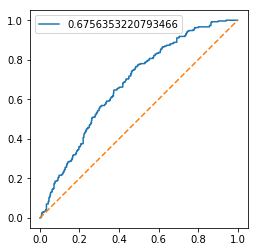

In [146]:
%matplotlib inline
plt.plot(fpr, tpr, label=auc_val)
plt.plot([0, 1], [0, 1], '--')
plt.axis('image')
plt.legend()
plt.show()

## Sum of max

In [128]:
dataset_root = '/home/nbonettini/MFC18_EvalPart1_Video_Ver1'
cnn_model = 'cnn_video_codec_seba'
feature_folder = '../features/{}'.format(cnn_model)

score=[]
label=[]
for i, row in tqdm_notebook(df.iterrows()):
    if os.path.exists(os.path.join(feature_folder, row.ProbeFileID + '.npy')):
        ff = np.load(os.path.join(feature_folder, row.ProbeFileID + '.npy'))
        if not np.all(ff == -1):
            score += [np.sum(np.max(np.mean(ff, axis=(0,1)), axis=1)) / 4]
            label += [0 if row.IsTarget == 'N' else 1]
        else:
            print(row.ProbeFileName)

KeyboardInterrupt: 

In [12]:
fpr, tpr, thr = roc_curve(label, score, pos_label=1)
auc_val = auc(fpr, tpr) 

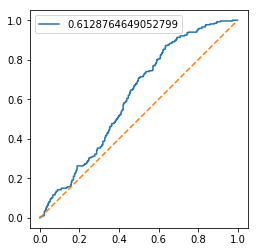

In [13]:
%matplotlib inline
plt.plot(fpr, tpr, label=auc_val)
plt.plot([0, 1], [0, 1], '--')
plt.axis('image')
plt.legend()
plt.show()

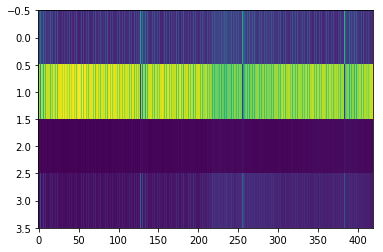

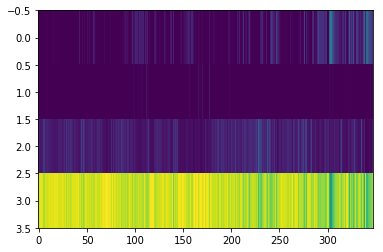

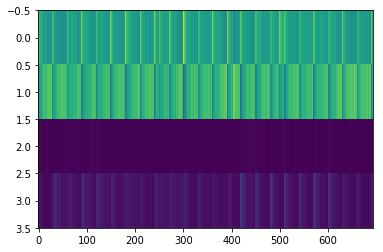

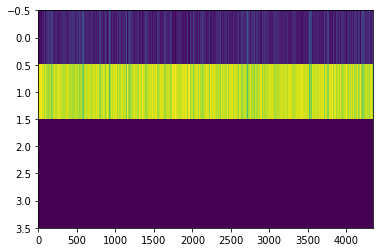

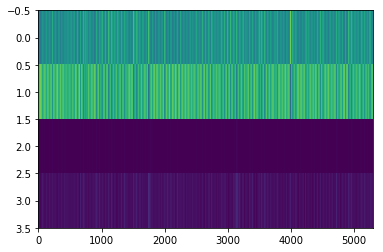

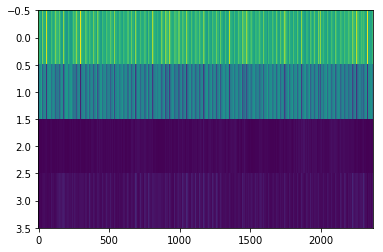

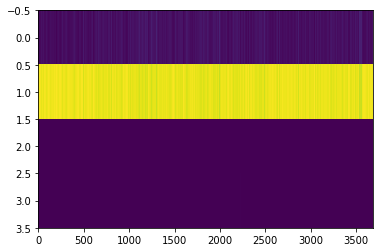

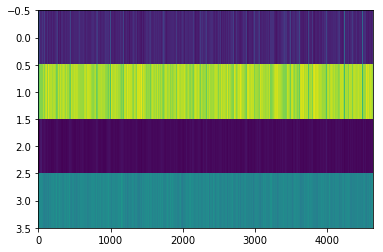

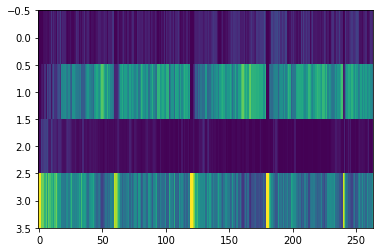

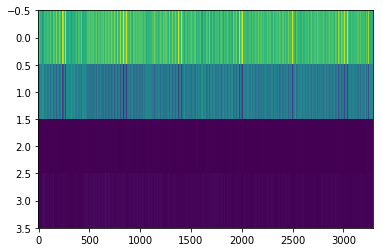

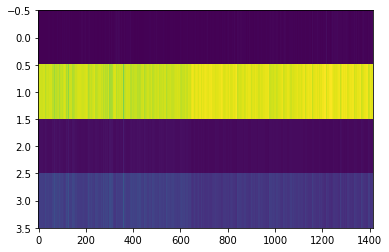

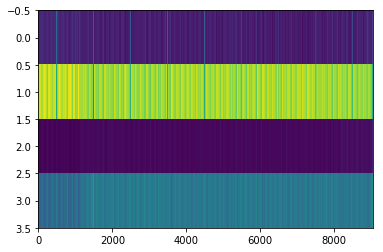

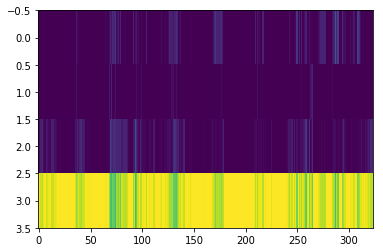

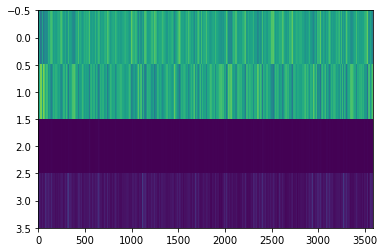

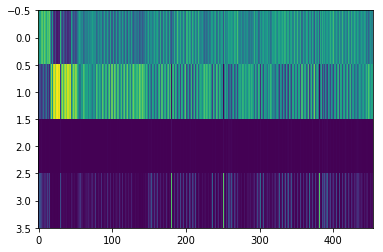

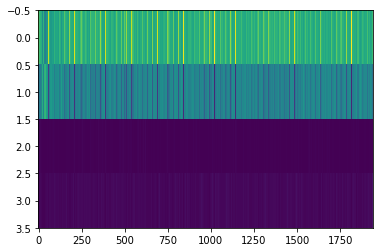

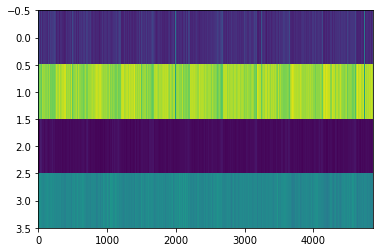

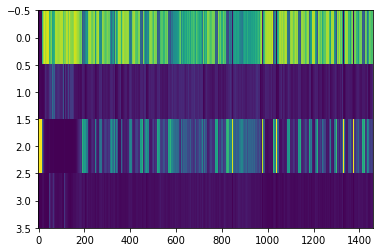

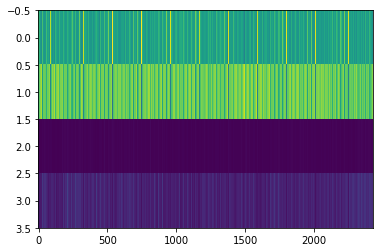

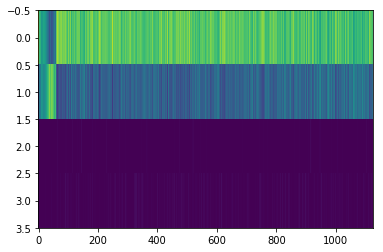

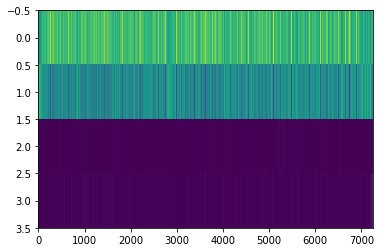

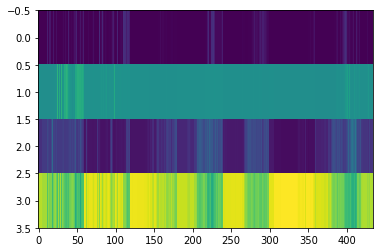

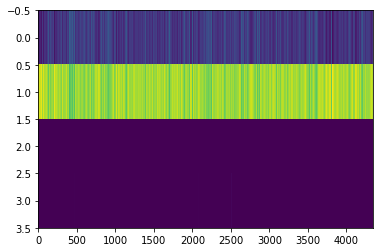

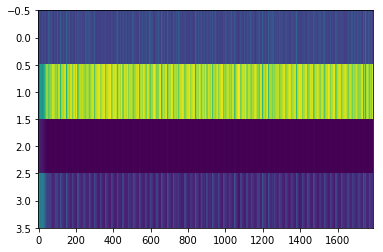

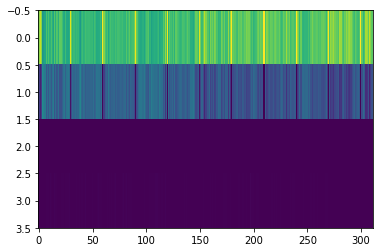

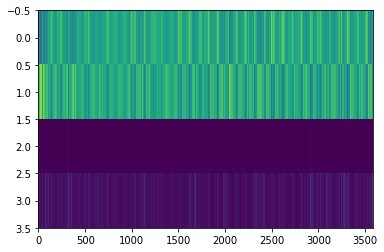

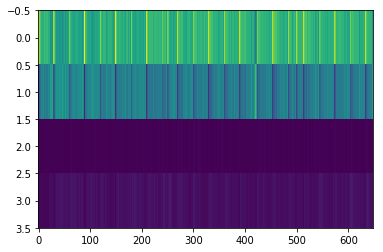

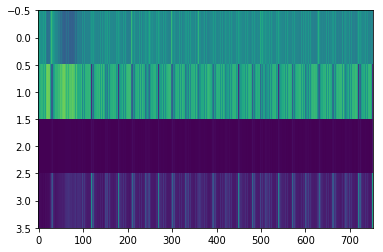

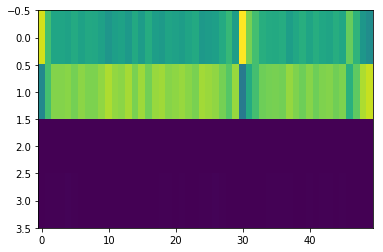

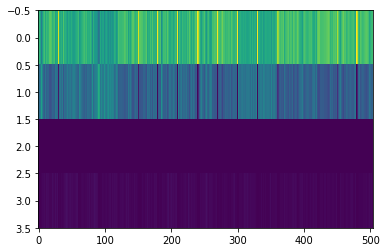

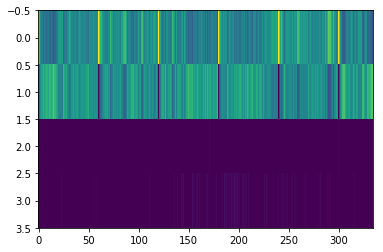

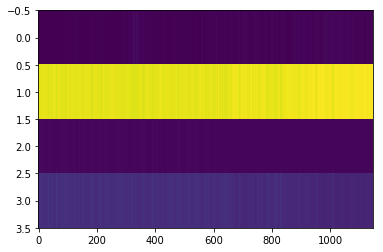

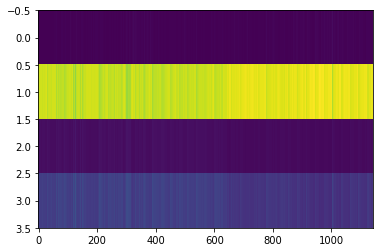

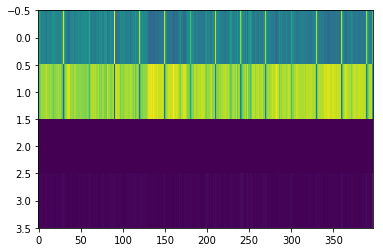

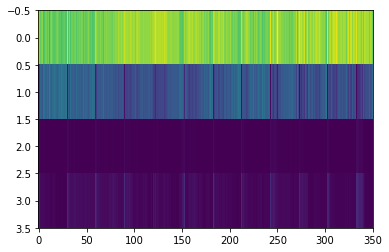

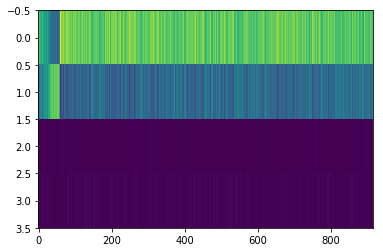

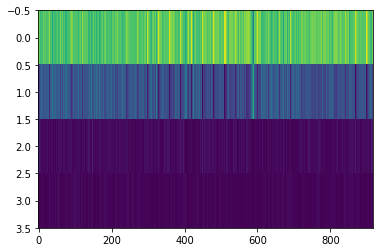

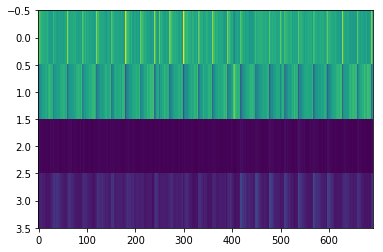

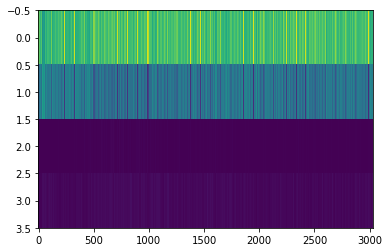

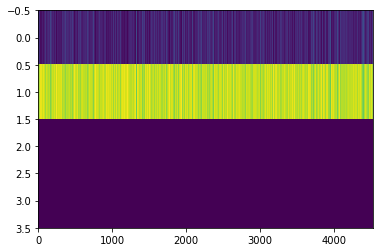

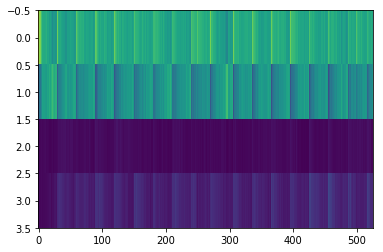

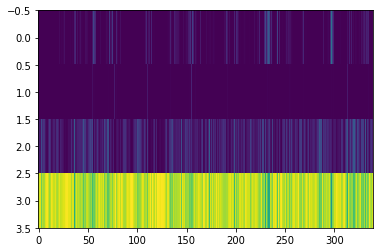

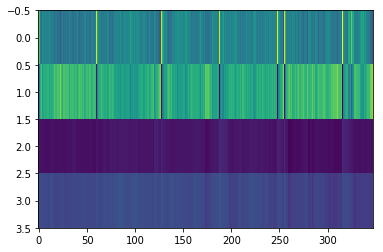

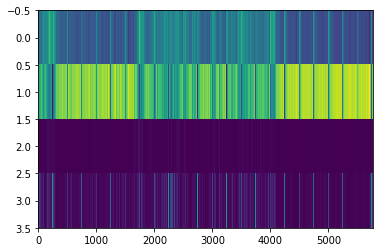

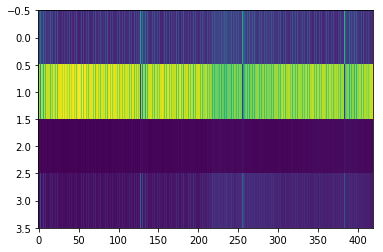

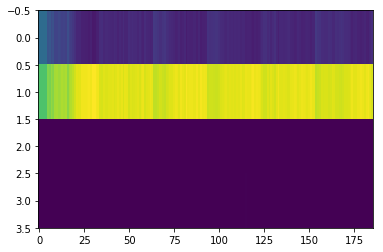

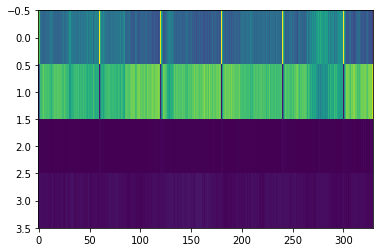

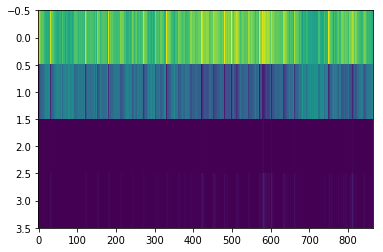

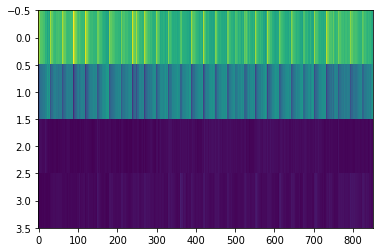

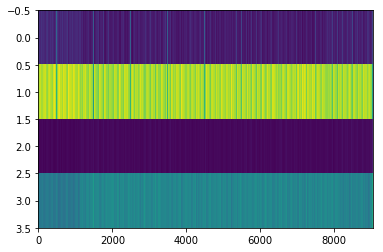

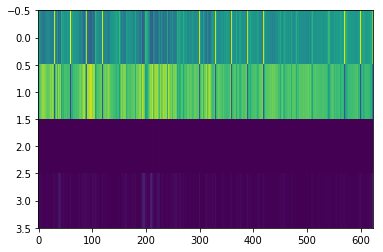

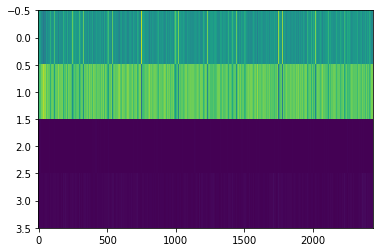

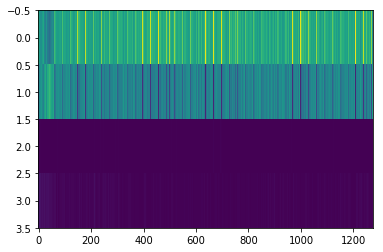

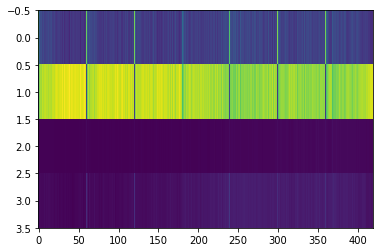

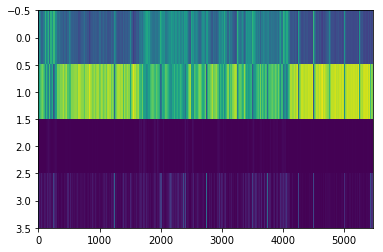

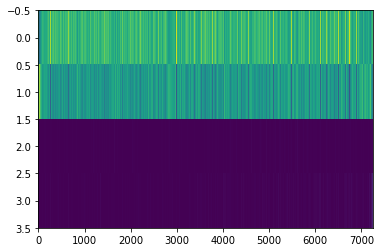

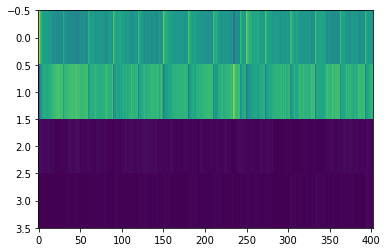

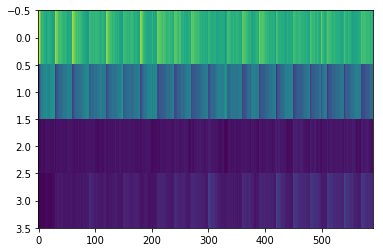

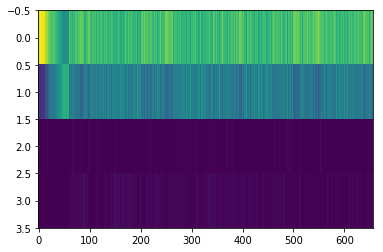

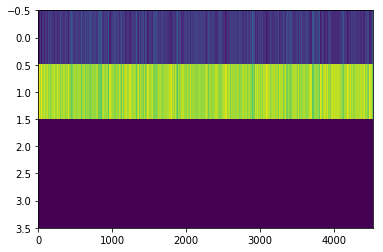

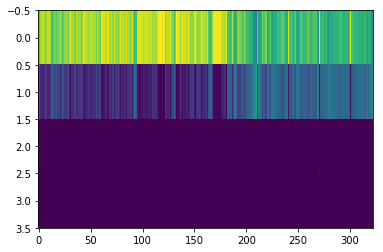

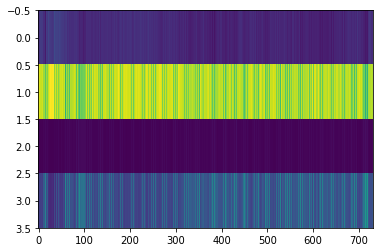

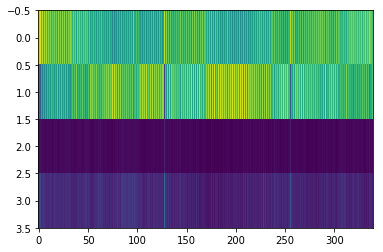

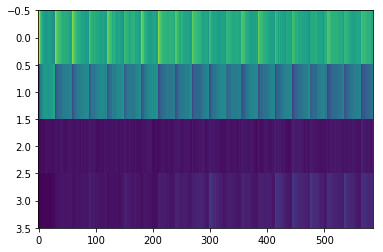

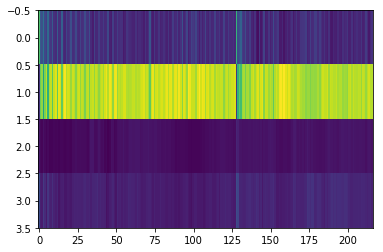

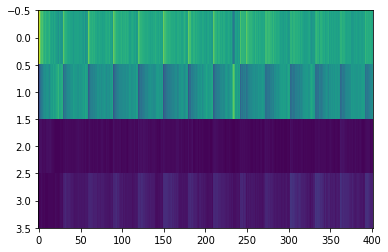

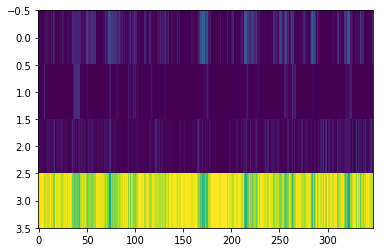

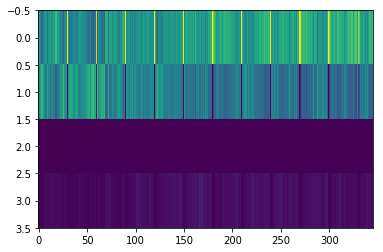

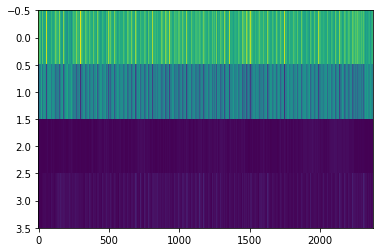

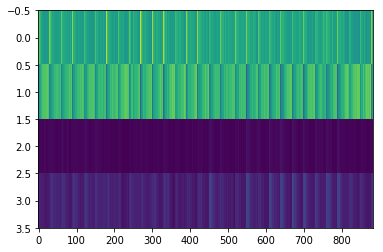

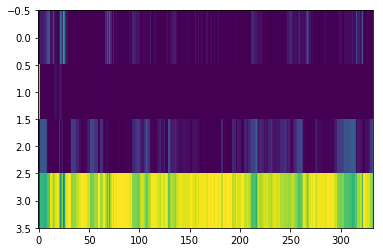

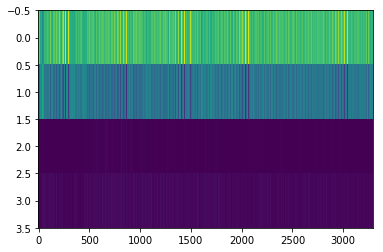

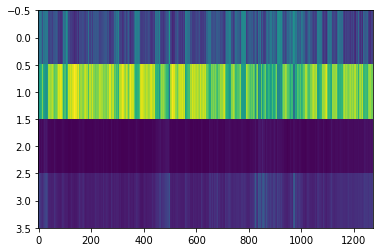

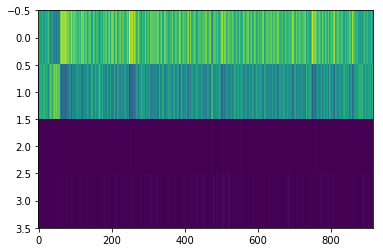

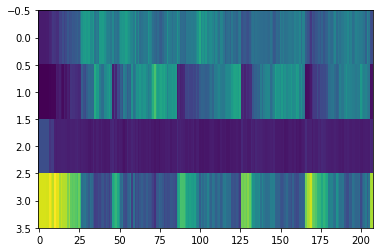

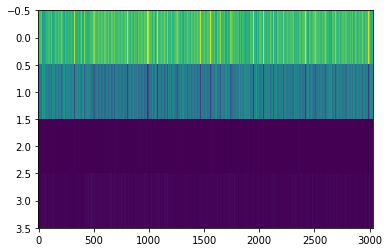

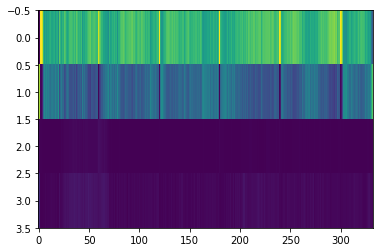

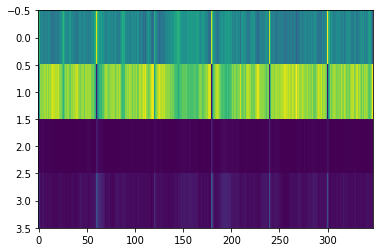

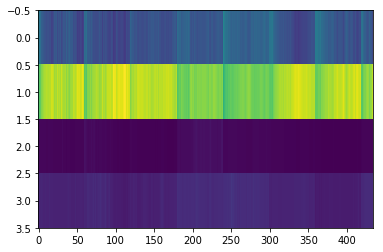

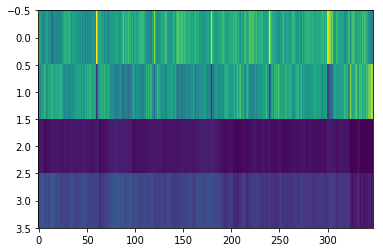

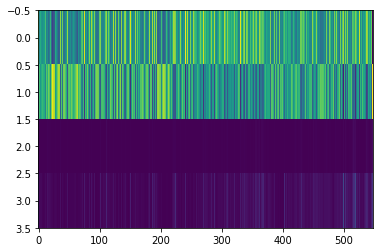

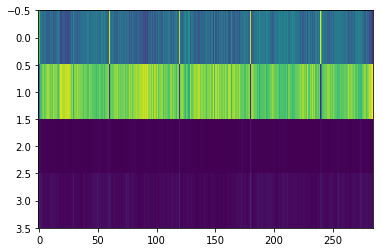

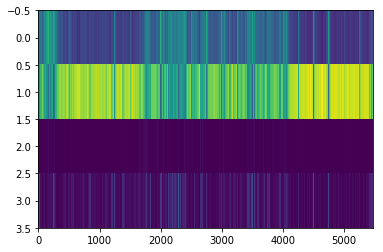

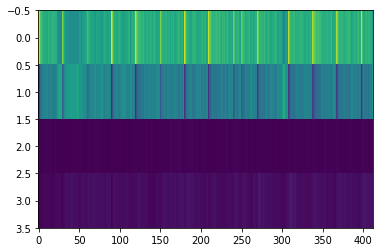

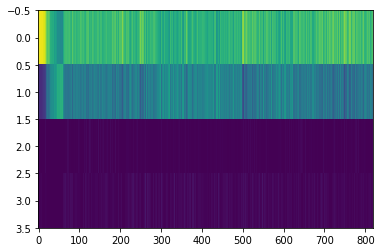

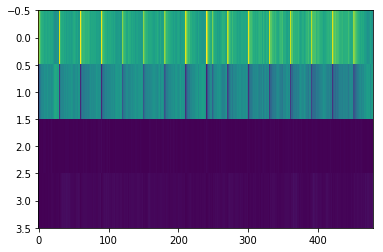

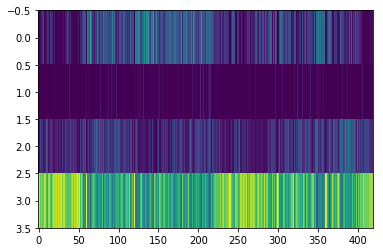

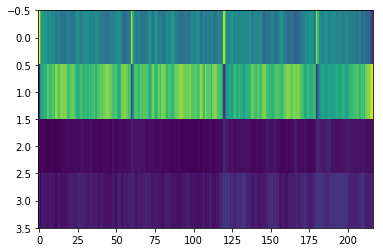

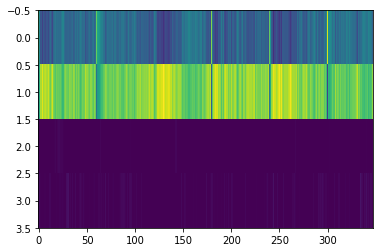

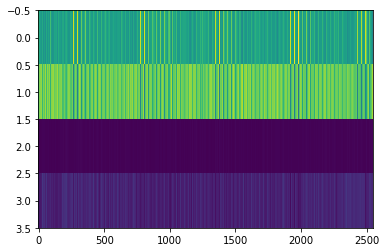

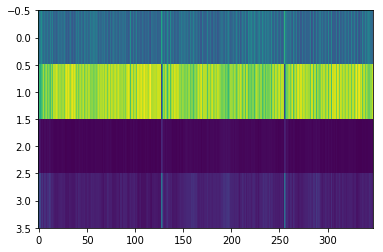

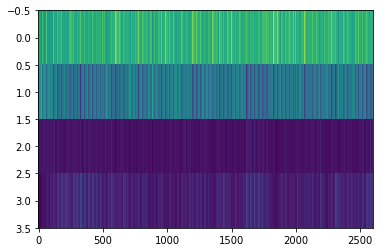

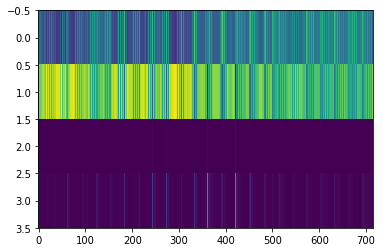

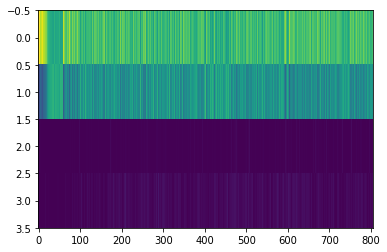

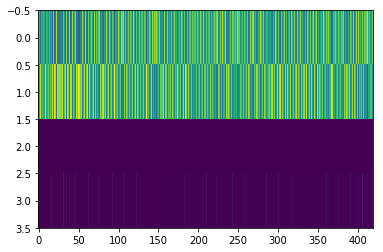

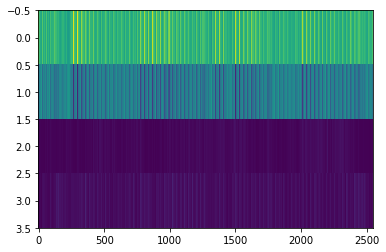

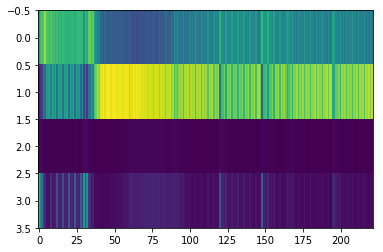

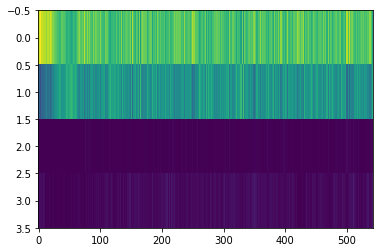

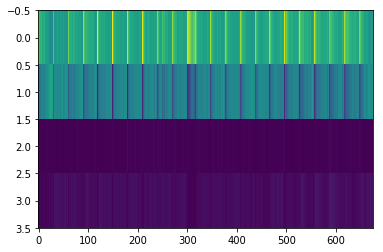

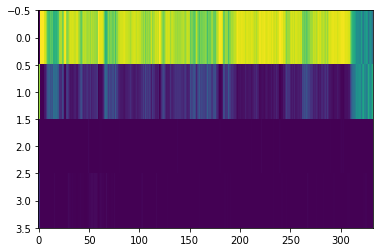

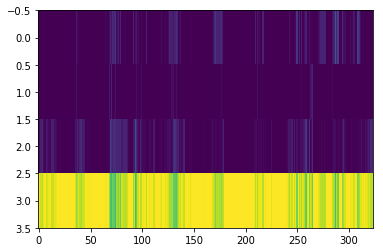

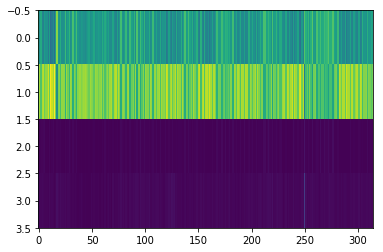

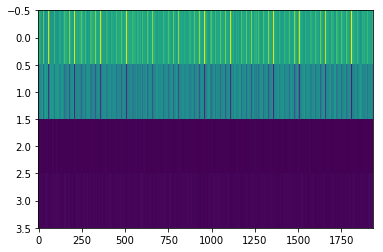

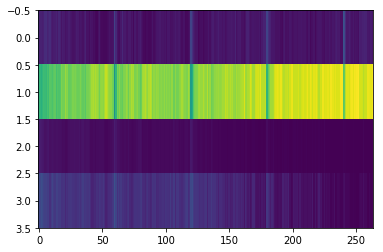

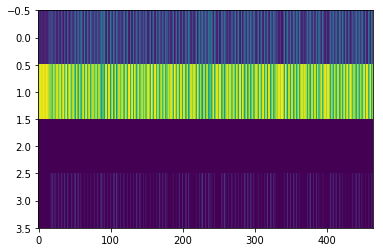

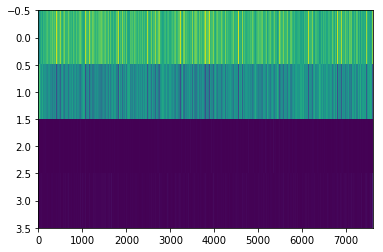

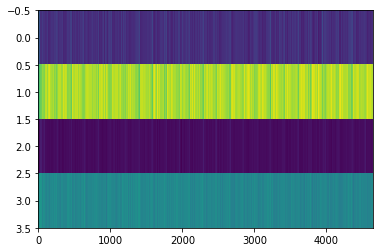

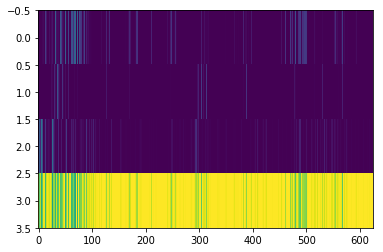

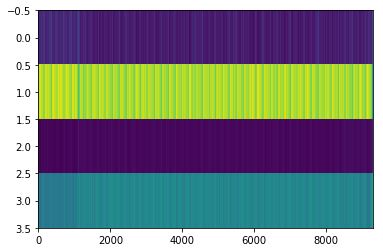

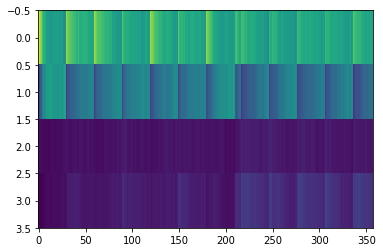

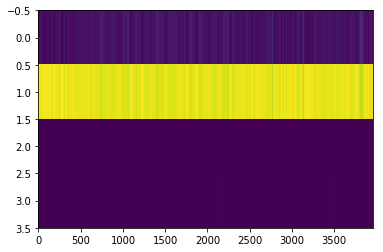

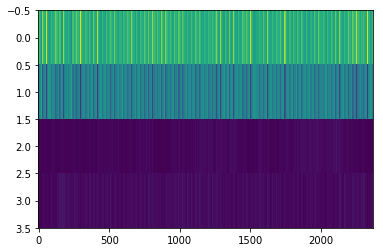

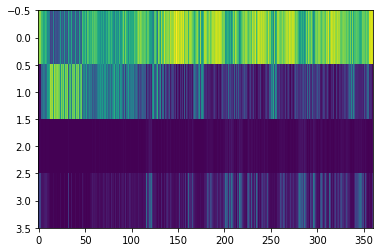

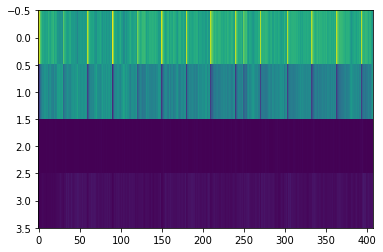

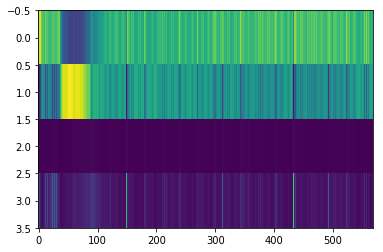

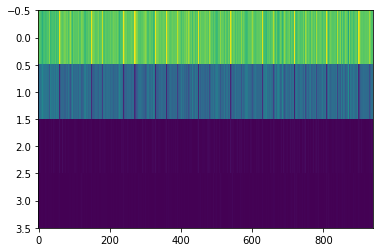

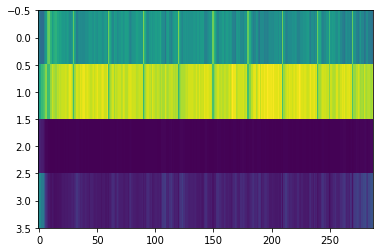

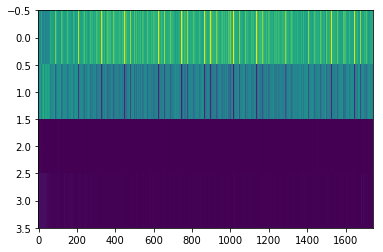

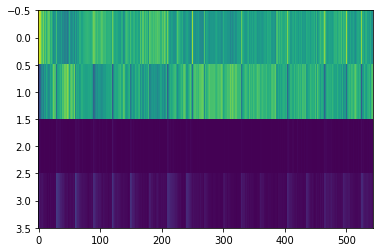

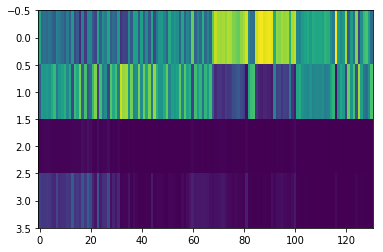

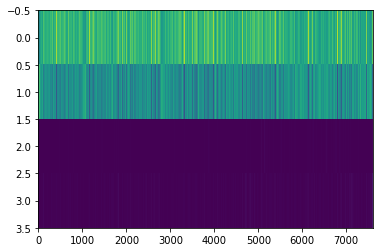

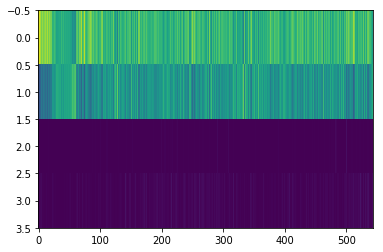

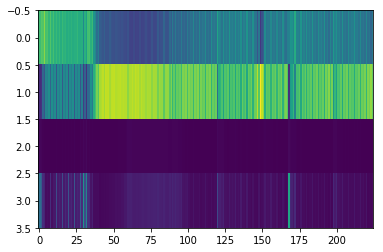

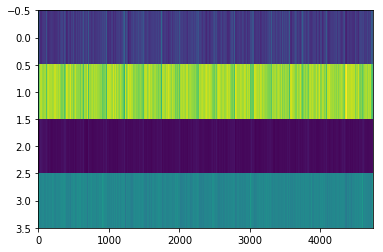

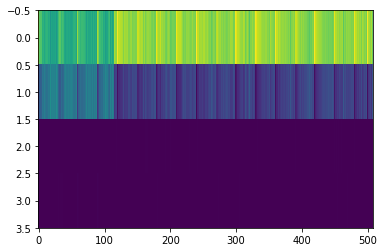

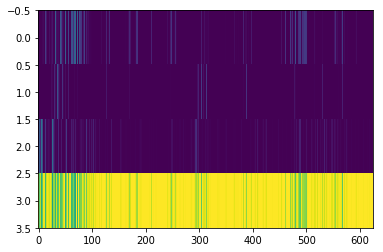

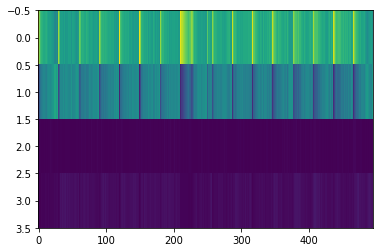

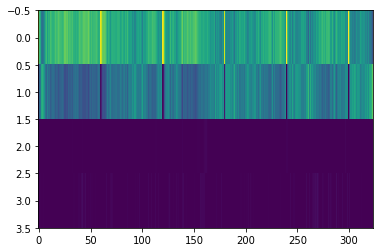

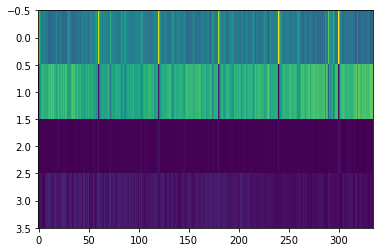

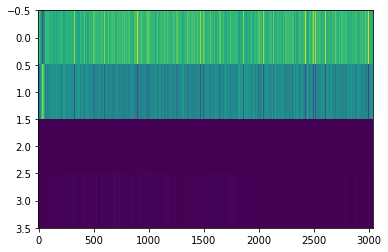

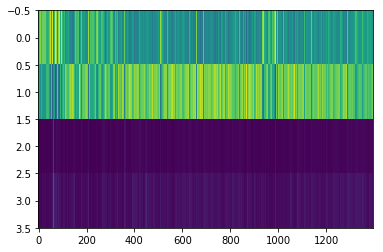

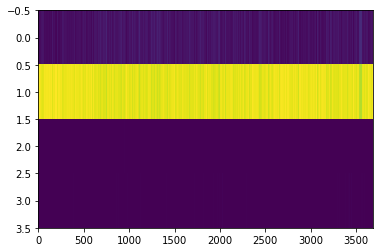

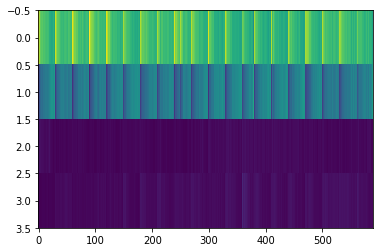

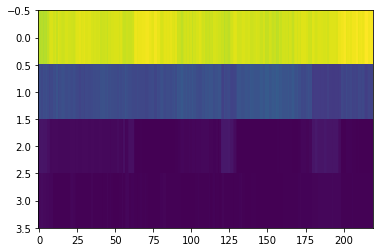

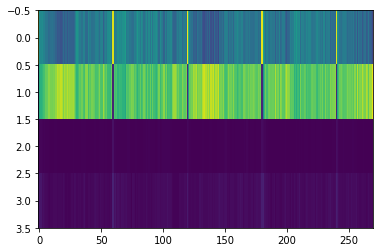

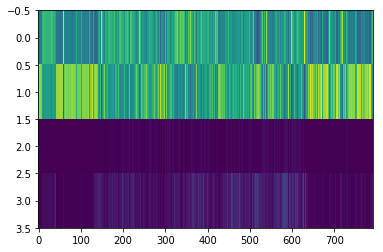

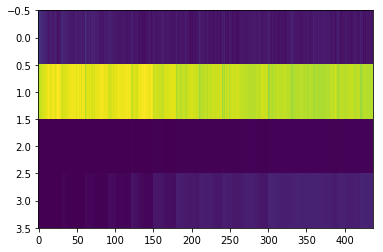

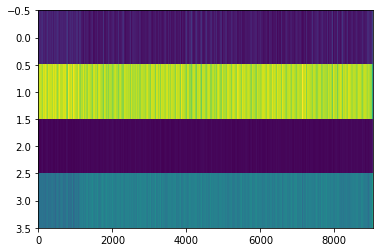

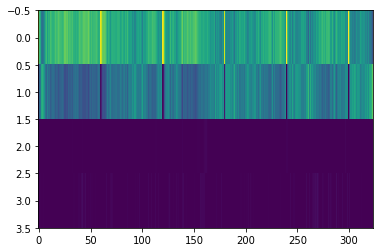

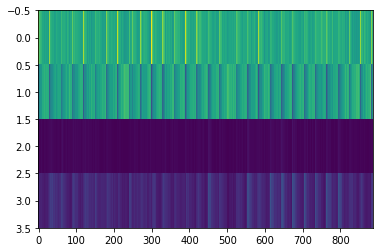

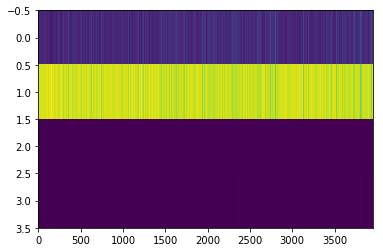

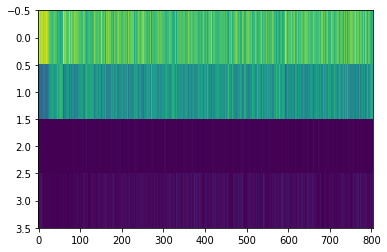

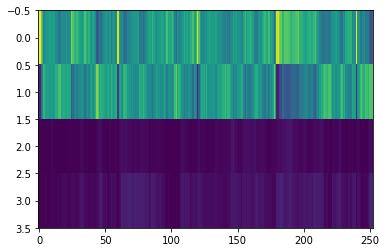

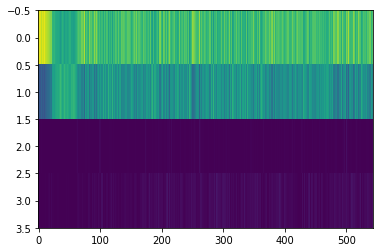

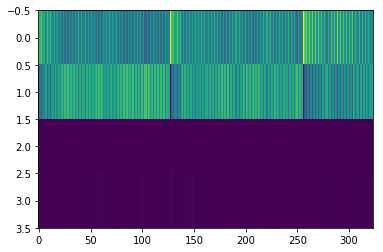

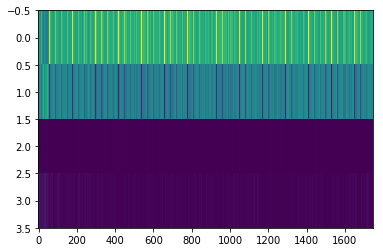

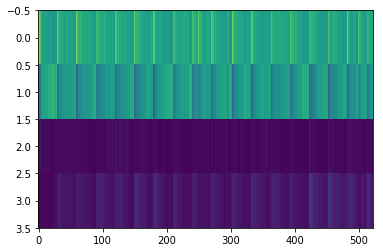

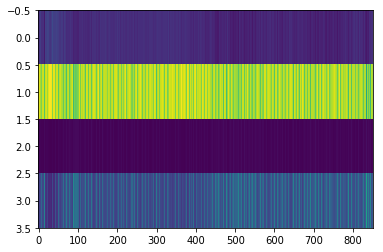

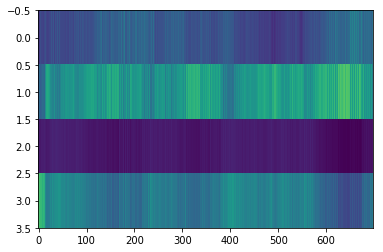

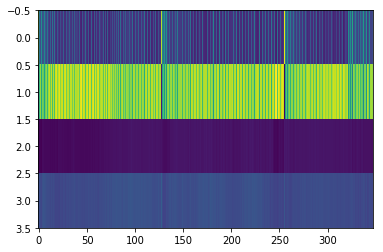

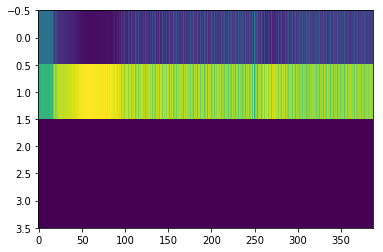

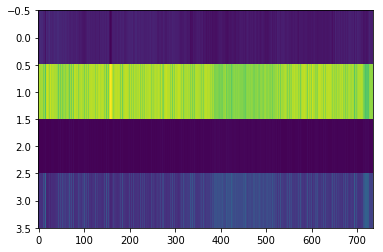

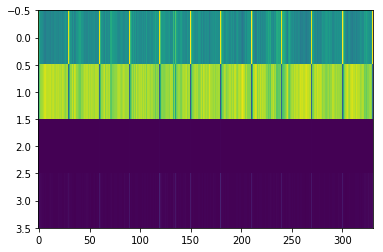

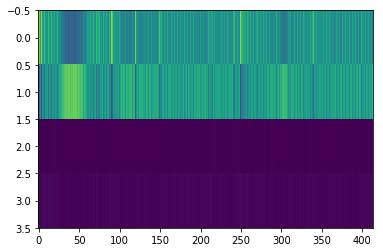

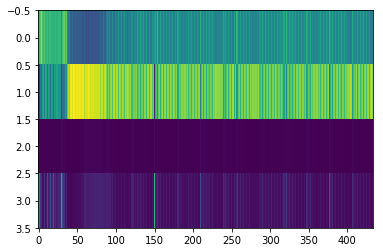

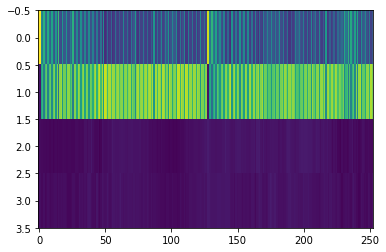

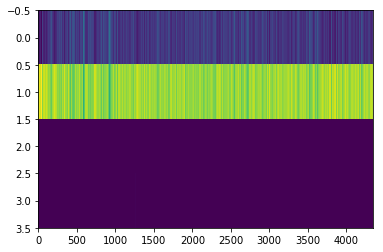

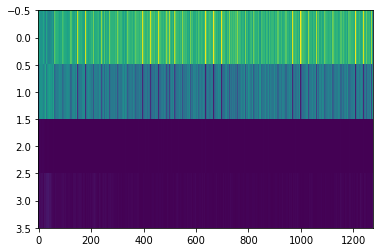

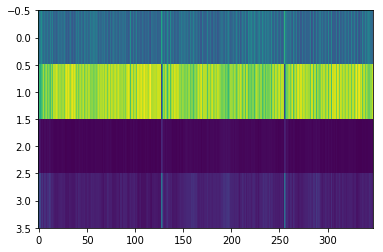

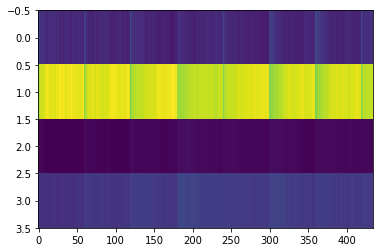

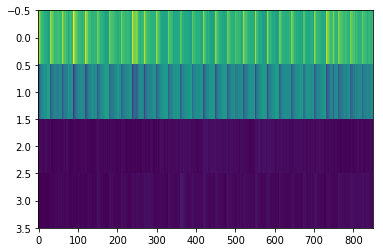

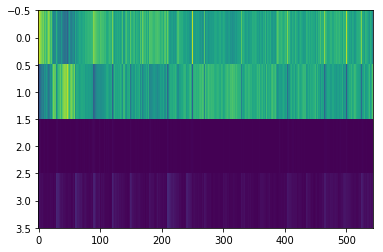

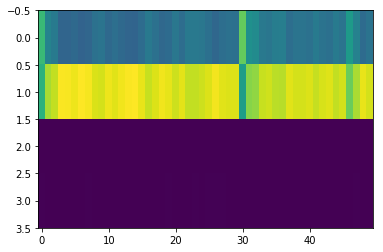

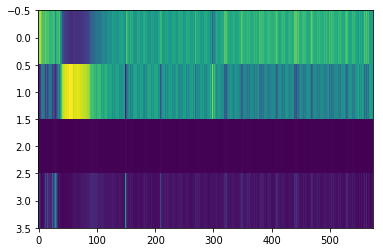

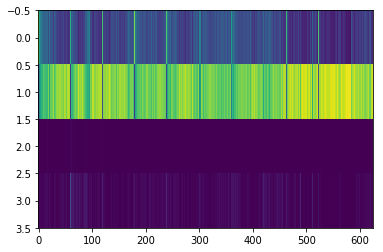

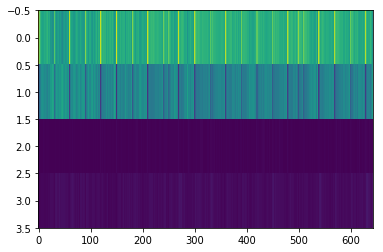

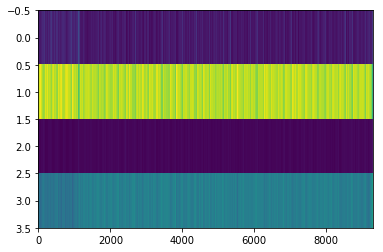

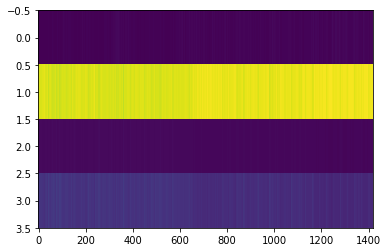

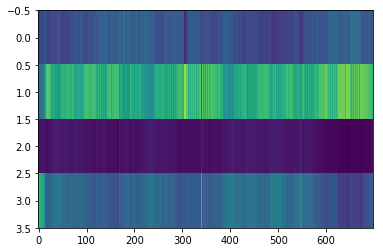

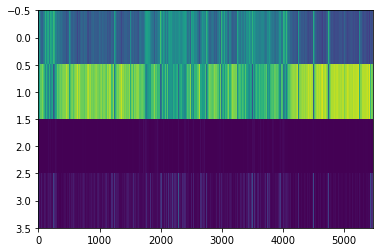

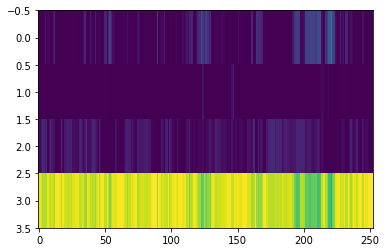

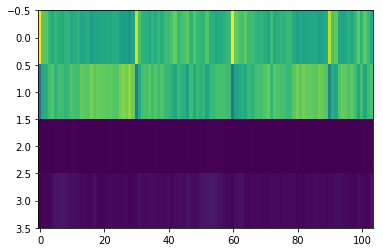

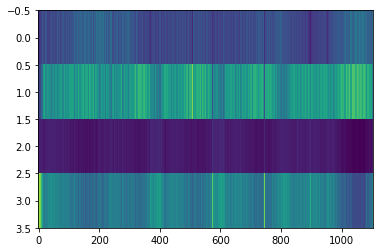

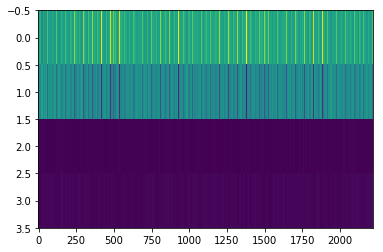

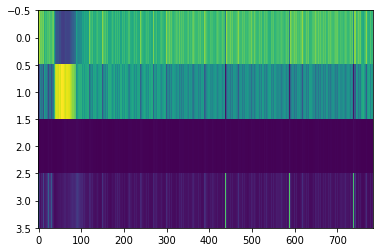

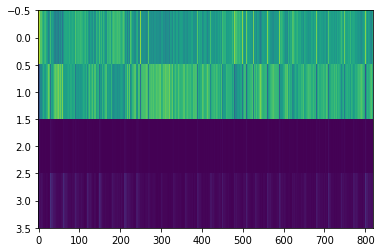

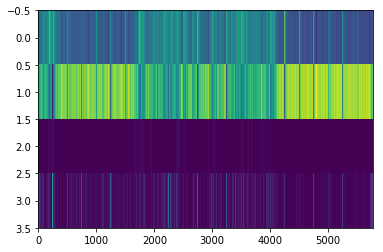

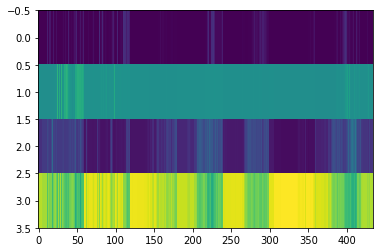

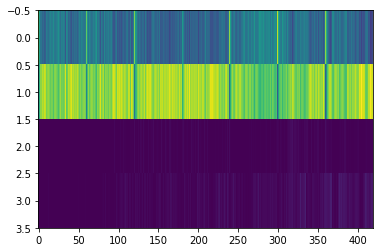

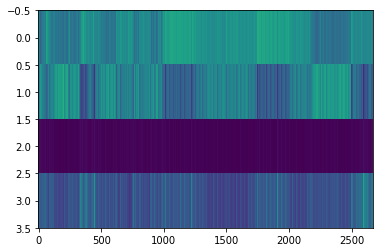

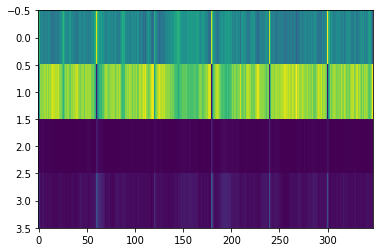

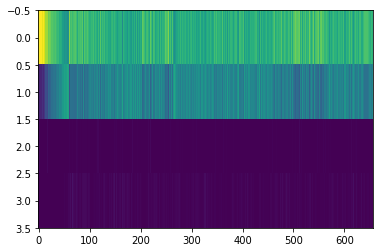

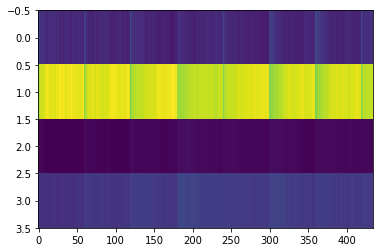

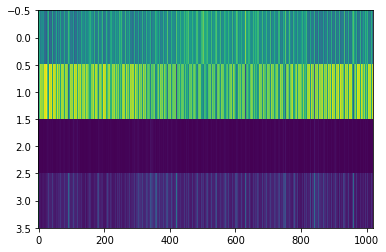

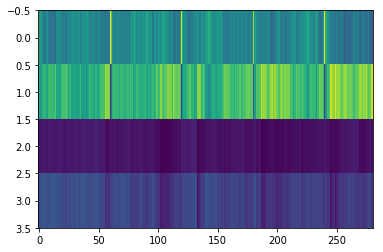

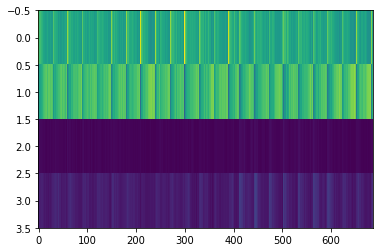

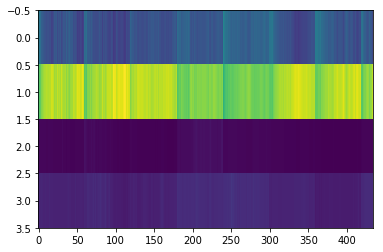

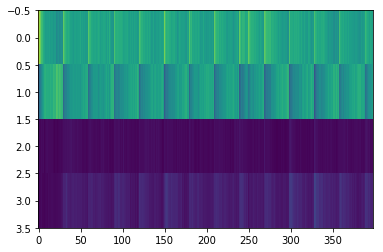

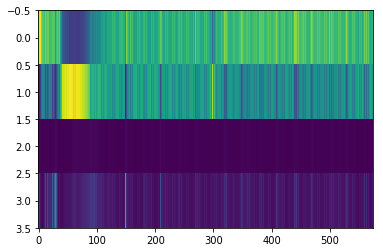

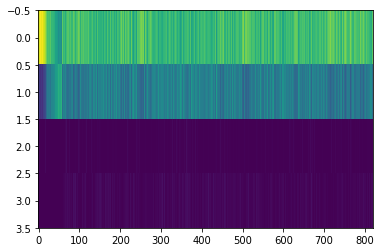

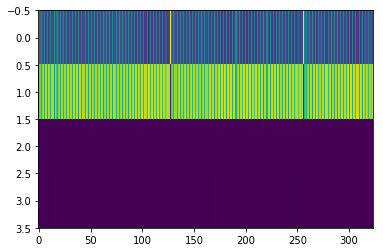

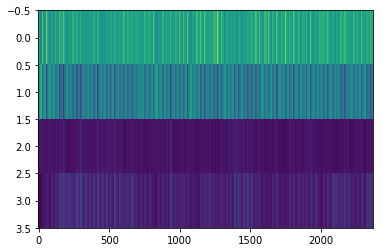

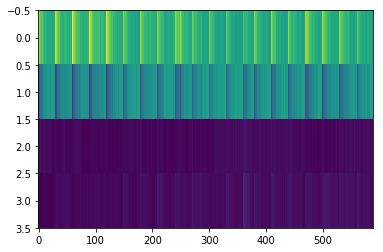

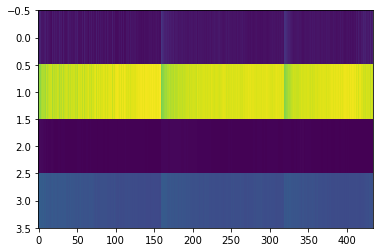

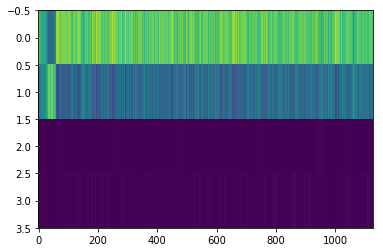

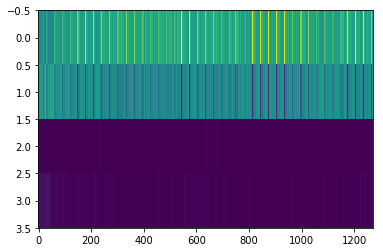

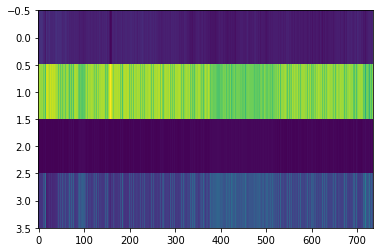

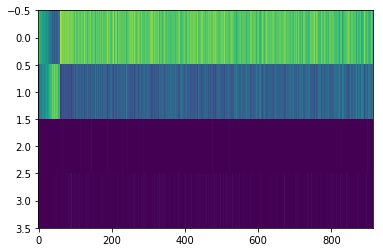

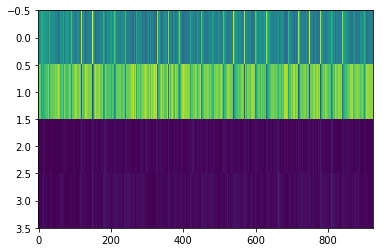

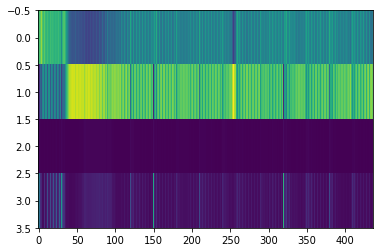

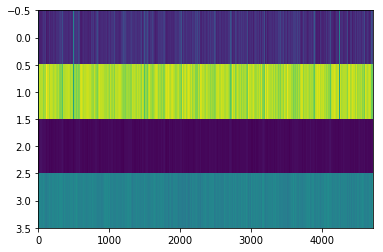

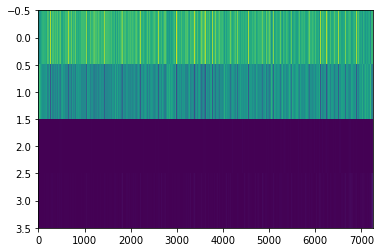

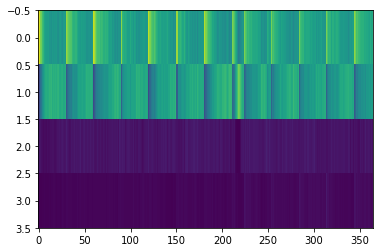

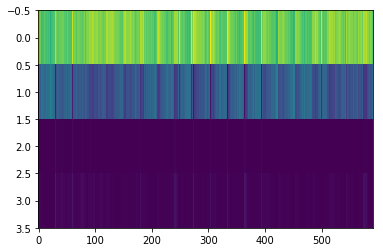

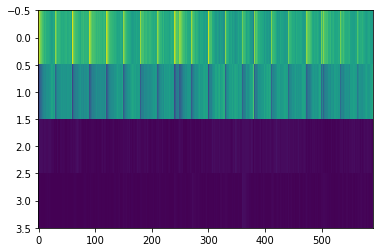

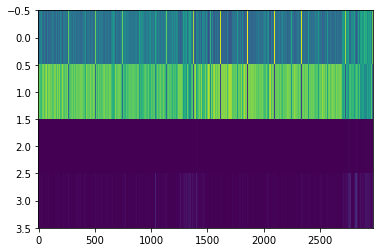

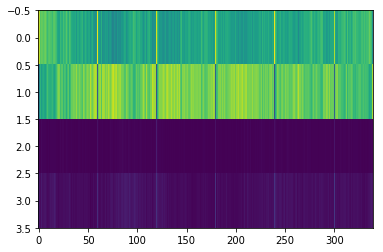

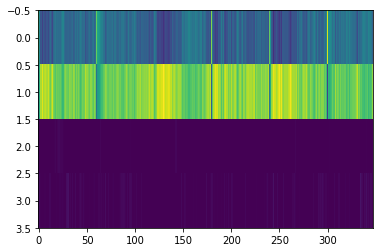

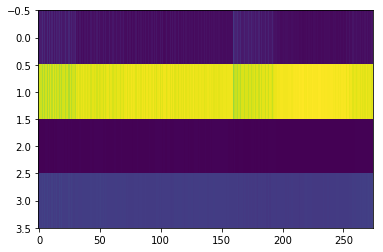

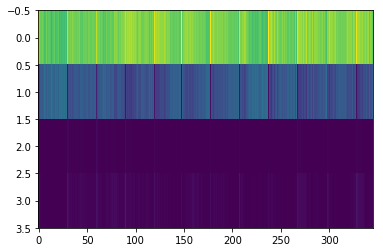

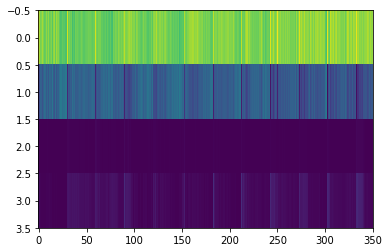

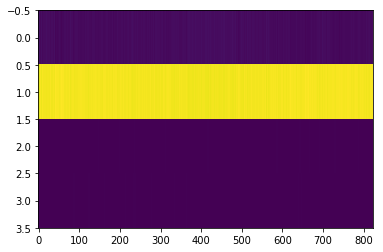

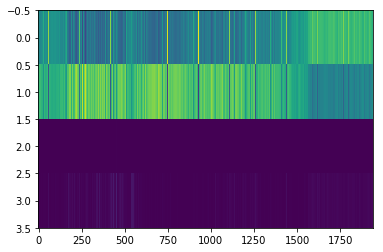

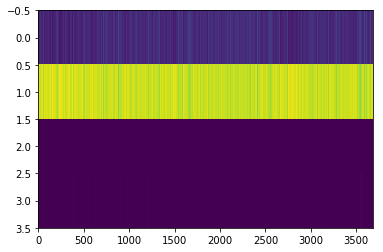

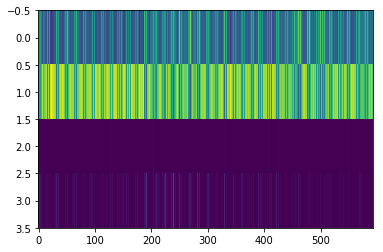

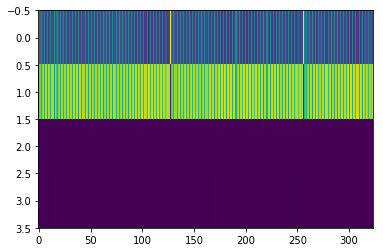

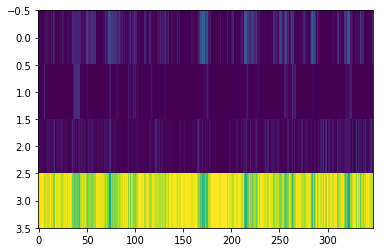

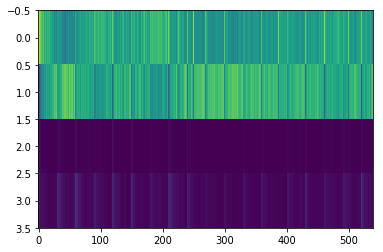

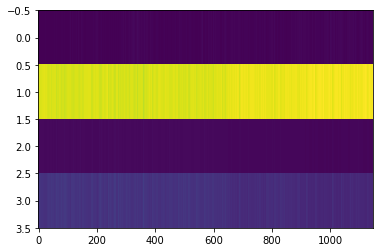

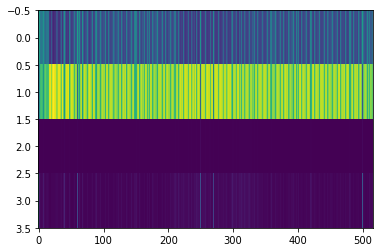

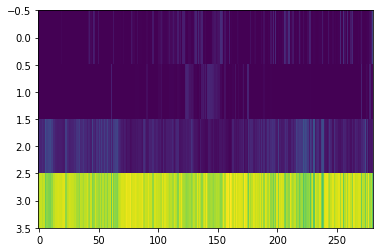

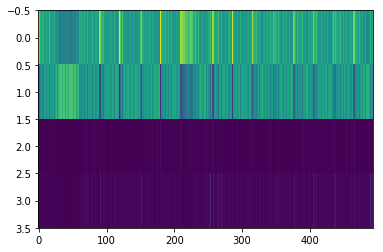

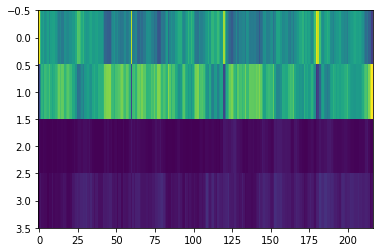

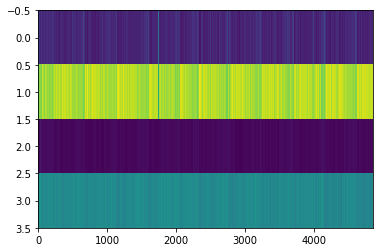

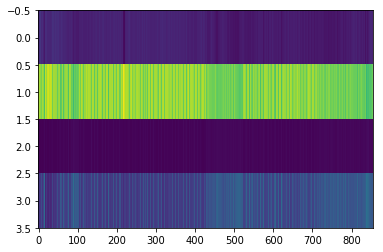

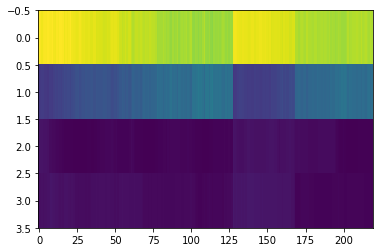

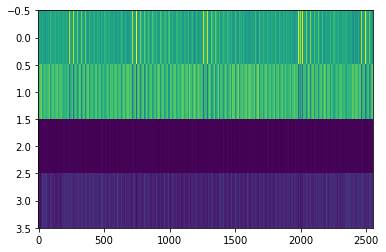

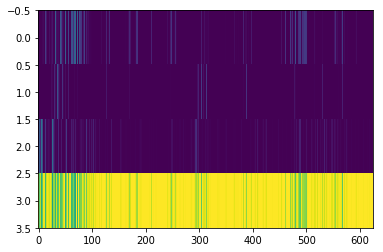

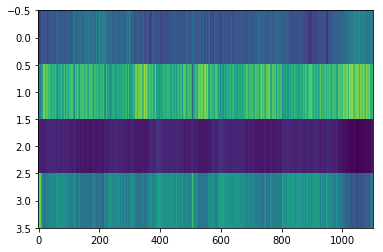

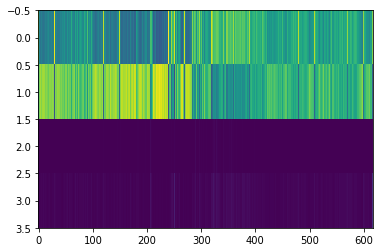

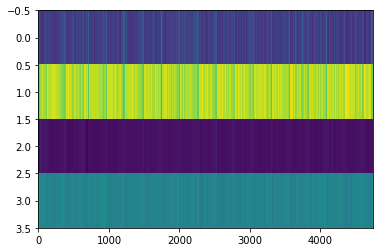

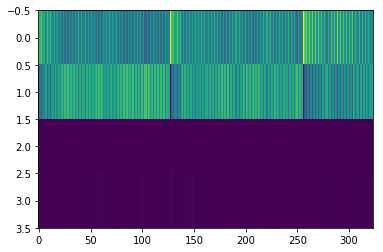

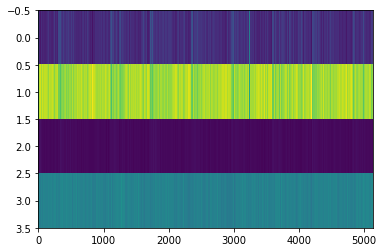

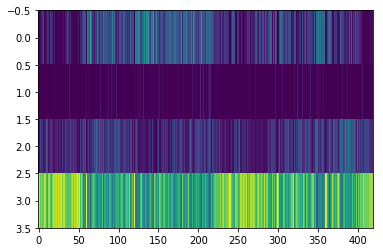

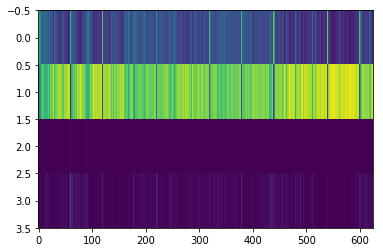

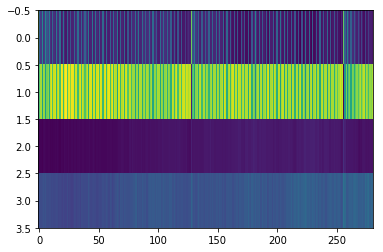

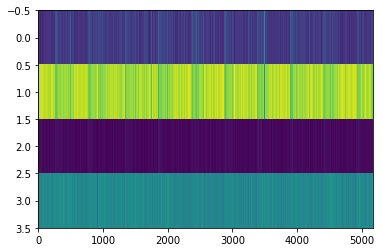

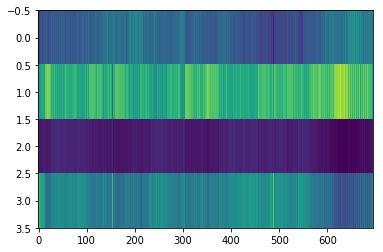

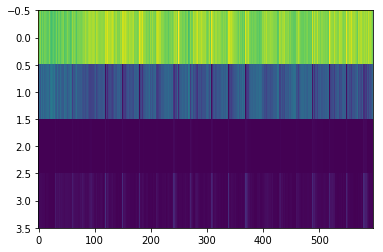

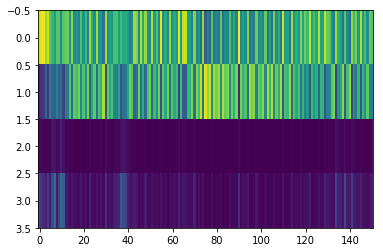

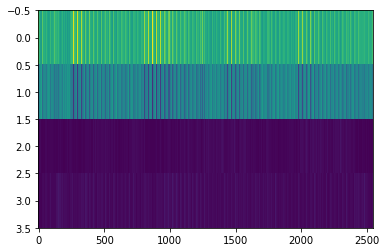

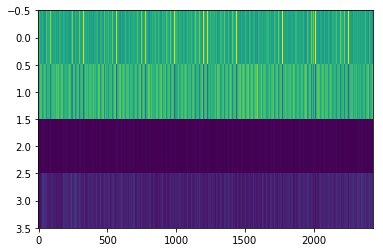

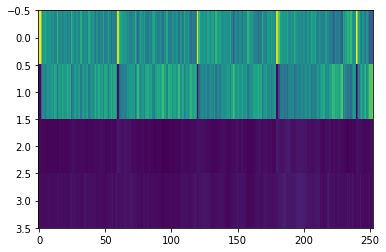

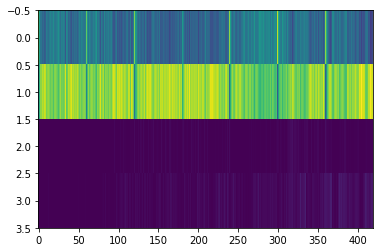

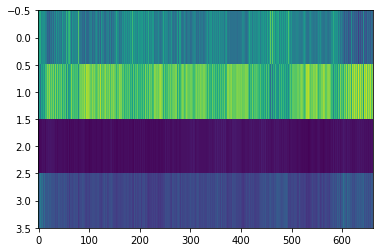

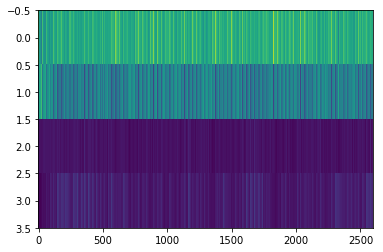

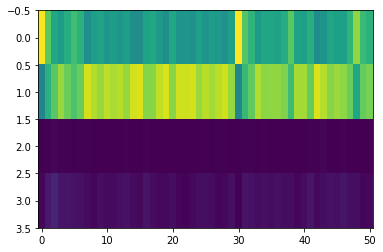

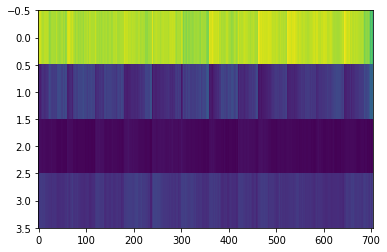

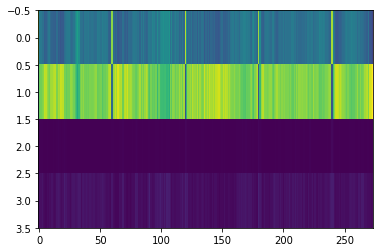

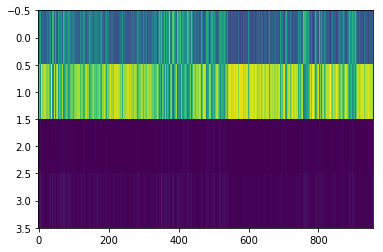

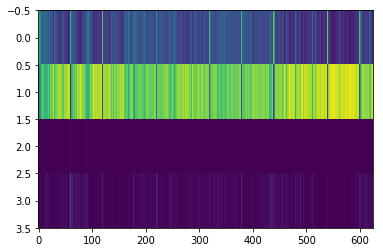

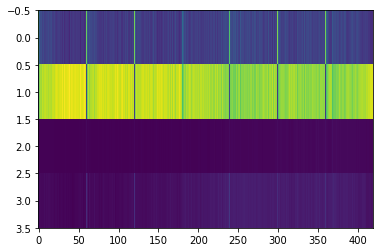

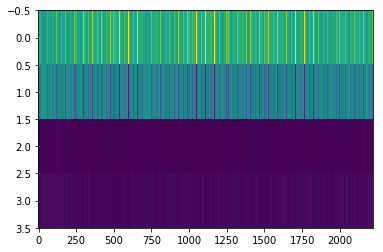

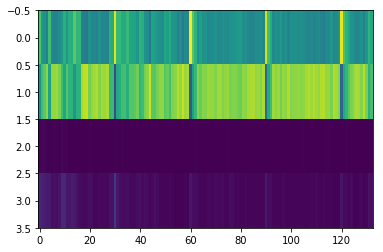

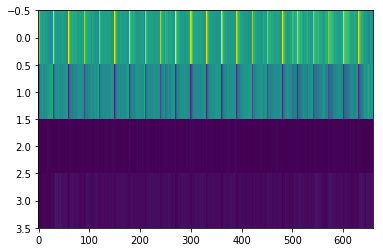

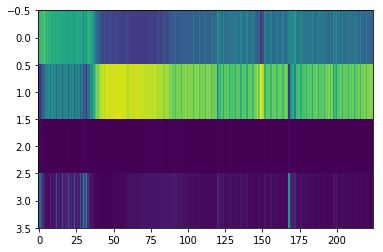

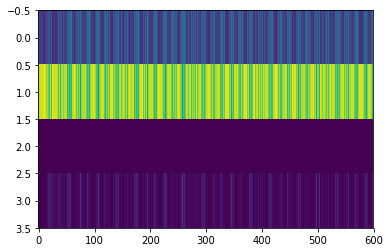

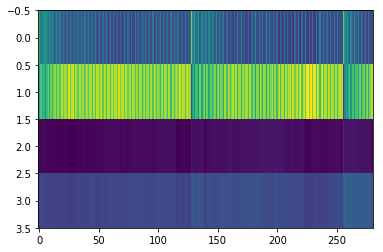

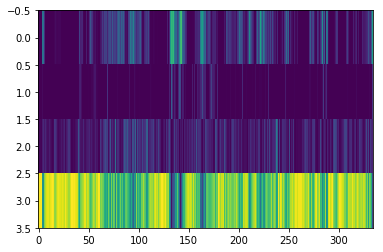

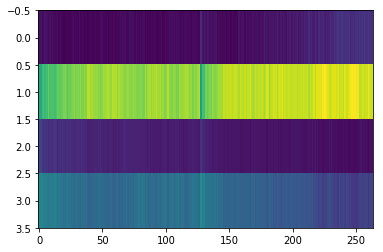

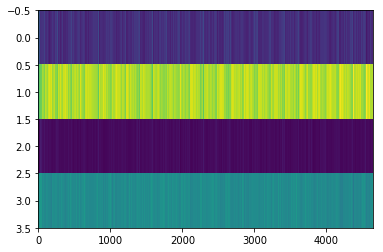

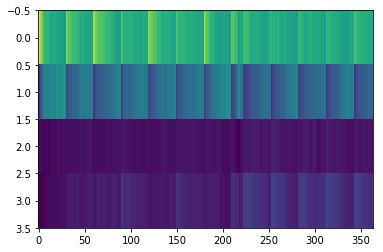

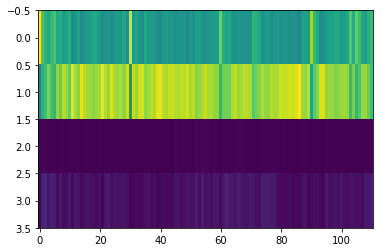

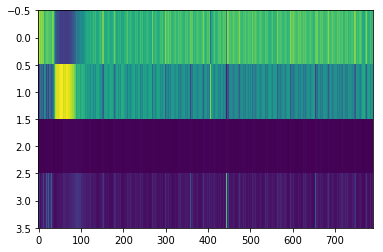

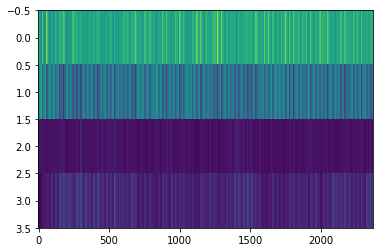

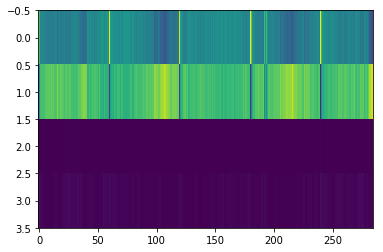

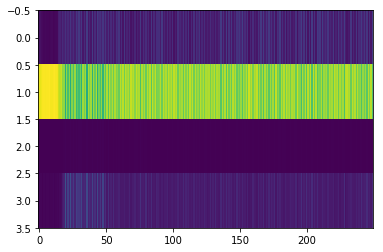

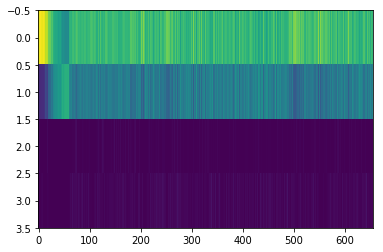

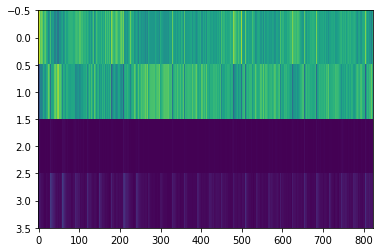

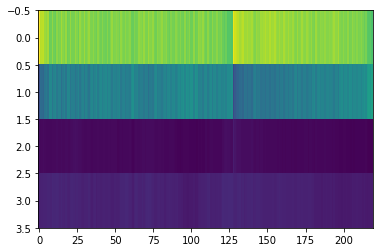

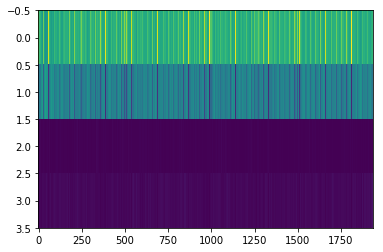

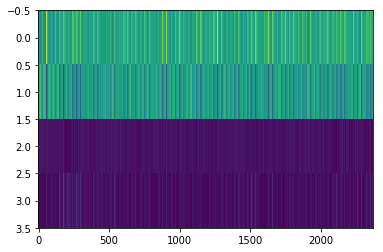

In [180]:
dataset_root = '/home/nbonettini/MFC18_EvalPart1_Video_Ver1'
cnn_model = 'cnn_video_codec_seba'
feature_folder = '../features/{}'.format(cnn_model)

score=[]
label=[]
cnt_t = 0
for i, row in tqdm_notebook(df.iterrows()):
    if os.path.exists(os.path.join(feature_folder, row.ProbeFileID + '.npy')):
        if row.IsTarget == 'Y':
            ff = np.load(os.path.join(feature_folder, row.ProbeFileID + '.npy'))
            if not np.all(ff == -1):
                plt.imshow(np.mean(ff, axis=(0,1)), aspect='auto')
                plt.show()

# Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [173]:
dataset_root = '/home/nbonettini/MFC18_EvalPart1_Video_Ver1'
cnn_model = 'cnn_video_codec_seba'
feature_folder = '../features/{}'.format(cnn_model)

score=[]
label=[]
for i, row in tqdm_notebook(df.iterrows()):
    if os.path.exists(os.path.join(feature_folder, row.ProbeFileID + '.npy')):
        ff = np.load(os.path.join(feature_folder, row.ProbeFileID + '.npy'))
        if not np.all(ff == -1):
            pure_ff = np.mean(ff, axis=(0,1,3))
            fv = [*list(pure_ff), np.max(pure_ff), np.min(pure_ff), pure_ff.mean(), pure_ff.std()]
            score += [np.asarray(fv).ravel()]
            label += [0 if row.IsTarget == 'N' else 1]
        else:
            print(row.ProbeFileName)

In [174]:
score_arr = np.asarray(score)[:, 2:4]
# clf = RandomForestClassifier()
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(score_arr, label)
y_hat = clf.predict(score_arr)

In [175]:
fpr, tpr, thr = roc_curve(label, y_hat, pos_label=1)
auc_val = auc(fpr, tpr) 

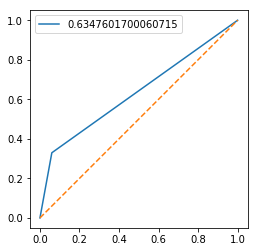

In [176]:
%matplotlib inline
plt.plot(fpr, tpr, label=auc_val)
plt.plot([0, 1], [0, 1], '--')
plt.axis('image')
plt.legend()
plt.show()

In [177]:
import graphviz

In [178]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 

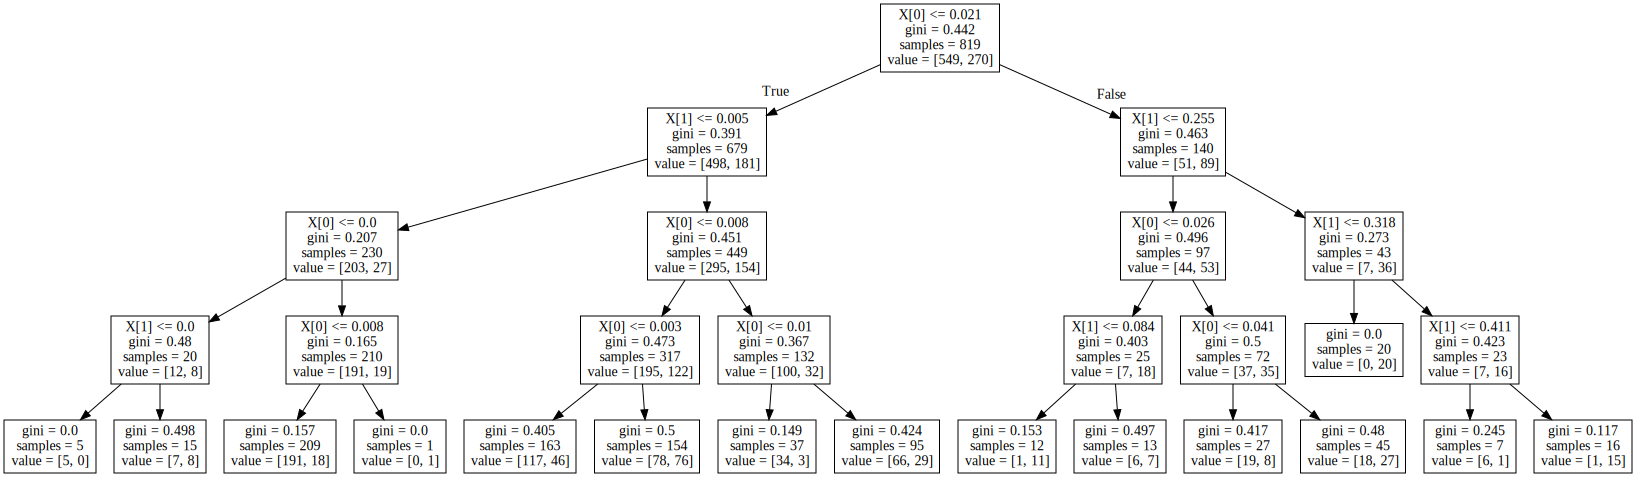

In [179]:
graph

# Selective scoring

In [36]:
dataset_root = '/home/nbonettini/MFC18_EvalPart1_Video_Ver1'
cnn_model = 'cnn_video_codec_seba'
feature_folder = '../features/{}'.format(cnn_model)

score=[]
label=[]
for i, row in tqdm_notebook(df.iterrows()):
    if os.path.exists(os.path.join(feature_folder, row.ProbeFileID + '.npy')):
        ff = np.load(os.path.join(feature_folder, row.ProbeFileID + '.npy'))
        if not np.all(ff == -1):
            score += [1-np.max(np.mean(ff, axis=(0,1,3)))]
            label += [0 if row.IsTarget == 'N' else 1]
        else:
            print(row.ProbeFileName)
    else:
        score += [np.nan]
        label += [np.nan]

In [60]:
fpr_list = []
tpr_list = []
auc_list = []
col_list = []
cnt_list = []
for i, col in tqdm_notebook(enumerate(df)):
    if i >= 13:
        idx_yes = df[(df.IsTarget == 'Y') & (df[col] != 'no')].index
        idx_no = df[df.IsTarget == 'N'].index
        idx = np.concatenate([idx_yes, idx_no]).astype(np.int)
        if len(idx_yes) > 0:
            score_filt = np.asarray(score)[idx]
            score_filt = score_filt[~np.isnan(score_filt)]
            label_filt = np.asarray(label)[idx]
            label_filt = label_filt[~np.isnan(label_filt)]
            fpr, tpr, thr = roc_curve(label_filt, score_filt, pos_label=1)
            fpr_list += [fpr]
            tpr_list += [tpr]
            auc_list += [auc(fpr, tpr)]
            col_list += [col]
            cnt_list += [len(idx_yes)]


/opt/miniconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [76]:
sorted_idx = np.argsort(auc_list)[-2::-1]

In [77]:
np.asarray(col_list)[sorted_idx]

array(['AntiforensicAddCamFingerprintPRNU', 'PostprocessCompression',
       'TemporalClone', 'TemporalRemove', 'CompositePixelSize',
       'ManipulationCategory', 'ImageCompression', 'AudioSplice',
       'SpatialRemove', 'SemanticRefabrication', 'SemanticRepurposing',
       'AudioRemoval', 'SpatialClone', 'ImageReformat', 'SpatialOther',
       'LaunderingSocialMedia', 'SemanticRestaging',
       'AntiforensicNoiseRestoration', 'SpatialSplice', 'AudioActivity',
       'TemporalSplice', 'PostprocessCropFrames', 'SpatialMovingObject',
       'AudioVoiceSwapping'], dtype='<U33')

In [78]:
np.asarray(auc_list)[sorted_idx]

array([0.84551887, 0.74633124, 0.74037252, 0.72149616, 0.6793309 ,
       0.6793309 , 0.6793309 , 0.65843264, 0.65739821, 0.64511654,
       0.63865066, 0.63836478, 0.63596004, 0.63404088, 0.60539891,
       0.56901688, 0.56886475, 0.56525157, 0.54224595, 0.53785377,
       0.53066038, 0.52044025, 0.50703409, 0.46540881])

In [79]:
np.asarray(cnt_list)[sorted_idx]

array([ 12,   3,  71, 119, 323, 323, 323,  19,  22,  17,  11,   2,  17,
        31,  93,  77, 100,   4,  39,  20,   6,   3,  19,   1])

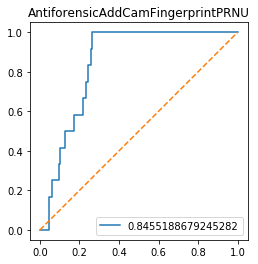

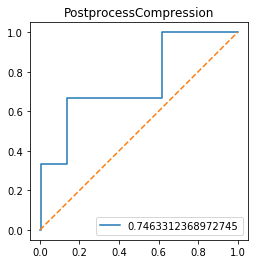

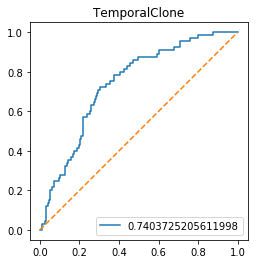

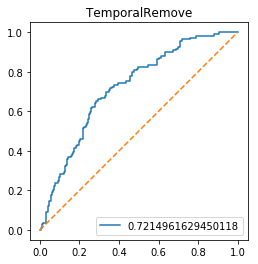

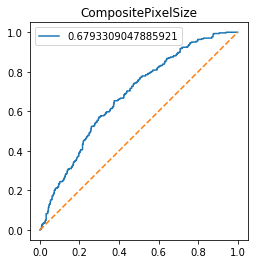

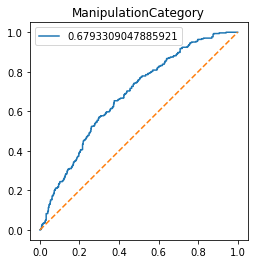

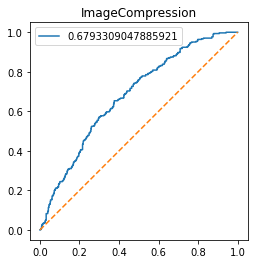

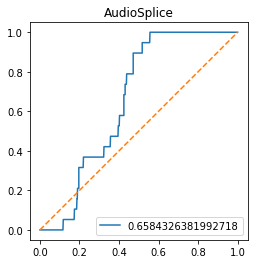

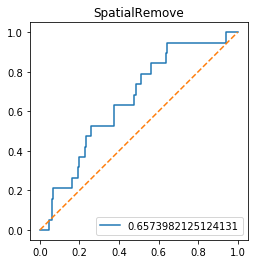

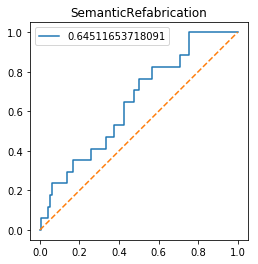

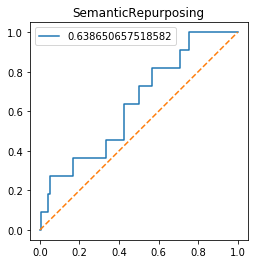

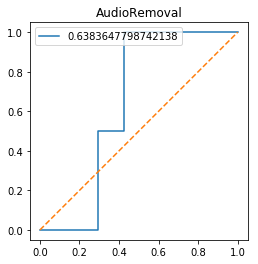

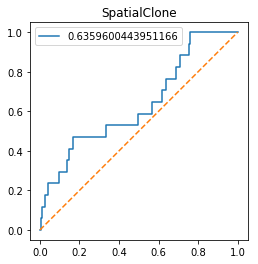

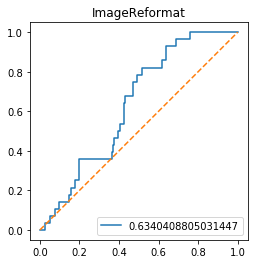

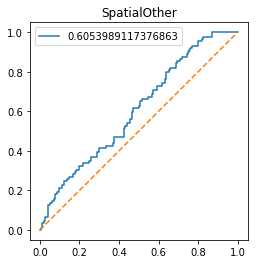

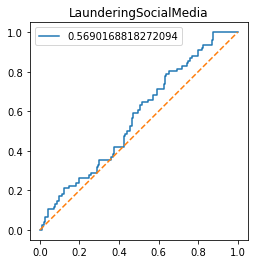

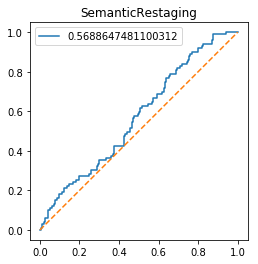

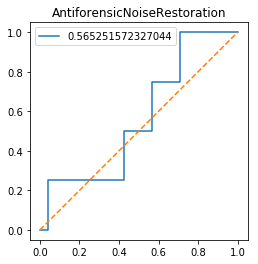

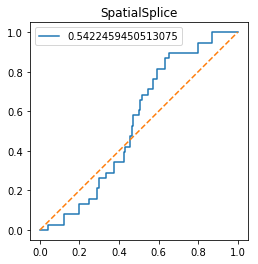

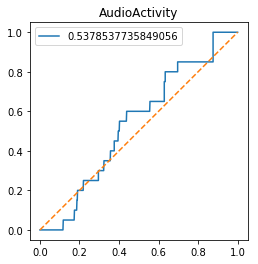

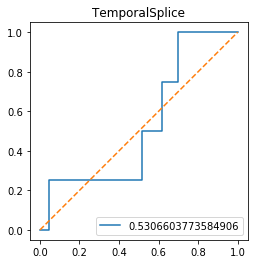

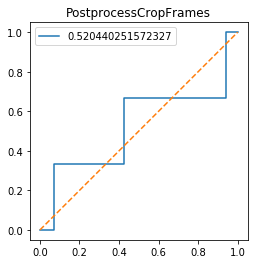

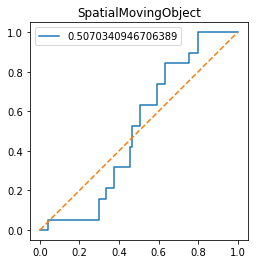

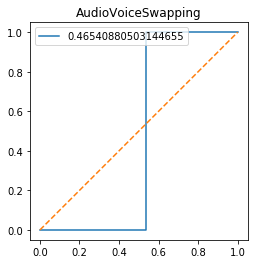

In [82]:
for i in sorted_idx:
    %matplotlib inline
    plt.plot(fpr_list[i], tpr_list[i], label=auc_list[i])
    plt.plot([0, 1], [0, 1], '--')
    plt.axis('image')
    plt.title(col_list[i])
    plt.legend()
    plt.show()

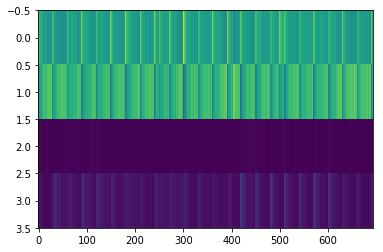

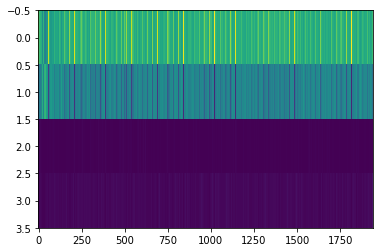

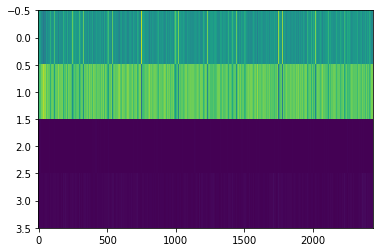

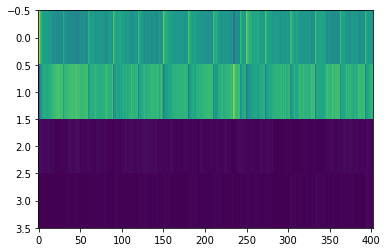

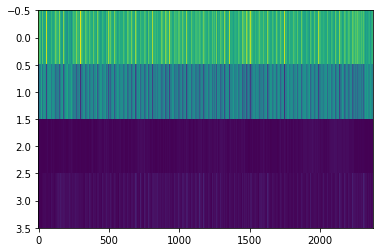

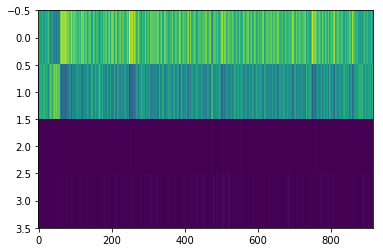

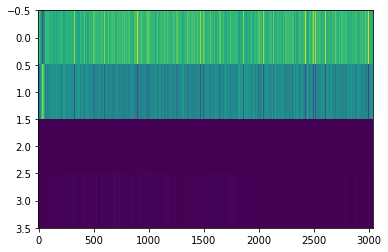

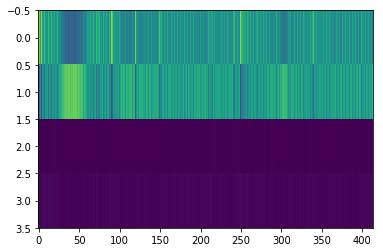

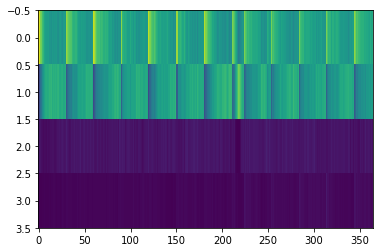

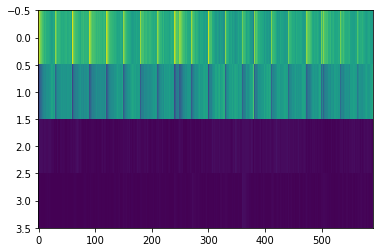

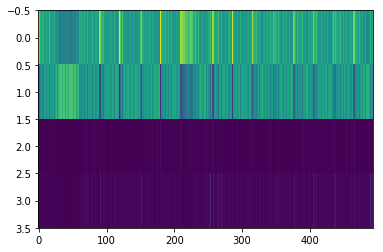

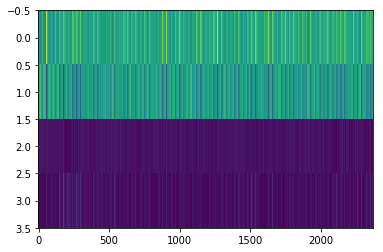

In [83]:
dataset_root = '/home/nbonettini/MFC18_EvalPart1_Video_Ver1'
cnn_model = 'cnn_video_codec_seba'
feature_folder = '../features/{}'.format(cnn_model)

score=[]
label=[]
cnt_t = 0
for i, row in tqdm_notebook(df.iterrows()):
    if os.path.exists(os.path.join(feature_folder, row.ProbeFileID + '.npy')):
        if row.IsTarget == 'Y':
            if row.AntiforensicAddCamFingerprintPRNU == 'yes':
                ff = np.load(os.path.join(feature_folder, row.ProbeFileID + '.npy'))
                if not np.all(ff == -1):
                    plt.imshow(np.mean(ff, axis=(0,1)), aspect='auto')
                    plt.show()